# This Notebook shows how the disaggregation of energy consumption on the level of applications works for the sectors CTS and industry 

## 1. Imports

In [4]:
# at first, the user has to import the respective packages and modules from the disaggregator
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal, plot, heat
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use(['science','no-latex'])
import matplotlib
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

In [5]:
detailed=False
year=2018
use_nuts3code=False

## 2. Plot Results


In [3]:
def plot_line(df, w_cm=12, title=None, f=1.8, ylabel='Verbrauch [TWh]', xlabel='', ylim=None, xlim=None, labels=['Test'], loc=None,
              ncol=None, coords=None, fs=9, fig_name=None, lw=1, rot=0, marker=True, fmt="%d-%m"):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    if marker:
        ax.plot(df, 'o-', markersize=1.5, linewidth=lw)
    else:
        ax.plot(df, linewidth=lw)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax.legend(labels, loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax.set_title(title)

    date_form = DateFormatter(fmt)
    ax.xaxis.set_major_formatter(date_form)

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()
    
def plot_multi_line (df, w_cm=12, ylabel='Verbrauch [TWh]', xlabel='', ylim=None, xlim=None, labels=None, loc=None, ncol=None, coords=None, fs=None, fig_name=None):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig, ax = plt.subplots(figsize=(w_in,(w_in/1.618)))
    
    df[0].plot(ax=ax, marker='o',markersize=1.5,linewidth=1.5)
    l = ax.get_lines()
    df[1].plot(ax=ax, linestyle='--', linewidth=1.5, color=list(i.get_color() for i in l))
    #plt.plot(, 'o-', markersize=2, linestyle='dashed')
    
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    plt.grid(True)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tick_params(axis='both', which='both', top=False, right=False)
    plt.legend(labels, loc=loc, bbox_to_anchor=(coords), ncol=ncol)

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

def plot_bar(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', legend=True, stacked=True, ylim=None, xlim=None, loc=None, ncol=None, coords=None, fs=9, fs_xticks=9,
             fig_name=None, lw=1, rot=0, percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha='center', fontsize = fs_xticks)
    if legend:
        ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    else:
        ax.get_legend().remove()
    ax.set_title(title)
    if percentage:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

### 01/02 Sektoren

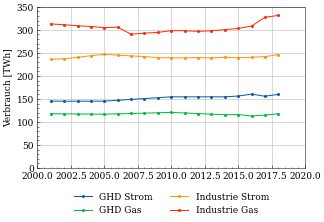

In [81]:
# 1 Bundesebene Zeitverlauf ohne Fuel Switch, Strom, Gas, GHD, Industrie 2001-2018
df_plot = pd.read_csv('./data_out/Diss/01_results_Bundesebene_2001_2018.csv', header=[0,1], index_col=[0])

plot_line(df_plot/1000000, ylim=(0,350), xlim=(2000, 2020), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'], fs=9, loc=9, coords=(0.5, -0.1), ncol=2)

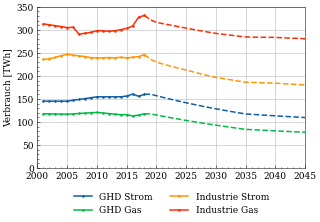

In [85]:
df_plot_2 = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])
plot_multi_line([df_plot/1000000, df_plot_2.append(df_plot.loc[2018]).sort_index()/1000000], w_cm=12, ylim=(0,350), xlim=(2000, 2045), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, fig_name = '01_Sektoren_Zeitverlauf')

TypeError: object of type 'generator' has no len()

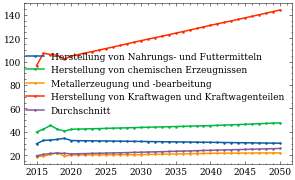

In [65]:
df_plot_2 = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])
plot_multi_line([df_plot/1000000, df_plot_2.append(df_plot.loc[2018]).sort_index()/1000000], w_cm=12, ylim=(0,350), xlim=(2000, 2045), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2)

In [35]:
df_plot = pd.read_csv('./data_out/Diss/01_results_Bundesebene_2001_2018.csv', header=[0,1], index_col=[0])
df_plot/1000000

Sektoren              CTS                industry            
Energieträger       power         gas       power         gas
2001           145.189739  117.947306  235.820151  312.963814
2002           145.201212  117.674464  237.349993  311.055531
2003           145.212684  117.401622  240.218309  308.936853
2004           145.224157  117.128780  243.885667  307.207274
2005           145.235630  116.855939  246.883180  304.845400
2006           147.116446  117.652547  245.055005  305.764505
2007           148.997262  118.449155  243.486849  290.470076
2008           150.878079  119.245763  241.996830  292.762659
2009           152.758895  120.042371  239.752751  294.455583
2010           154.639712  120.838979  239.120972  298.276484
2011           154.643467  119.578246  239.163605  298.055310
2012           154.647226  118.317514  239.914821  296.756569
2013           154.650985  117.056782  239.137461  297.930380
2014           154.654744  115.796049  240.578459  300.405920
2015           156.354308  116.112566  239.240468  303.066102
2016           160.417099  113.007109  240.502617  308.255497
2017           155.949694  115.013113  241.783854  327.267095
2018           159.980641  117.832099  246.402799  331.321089

In [32]:
df_plot_2 = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])

In [34]:
df_plot_2/1000000

Sektoren              CTS                industry            
Energieträger       power         gas       power         gas
2019           160.442442  117.655348  236.314278  321.861026
2020           157.062508  115.129901  229.961809  316.228617
2021           153.790544  112.668625  226.144149  313.652140
2022           150.622935  110.269745  222.542468  311.182966
2023           147.556194  107.931536  219.298459  308.682723
2024           144.586962  105.652328  215.730306  306.194357
2025           141.711996  103.430509  212.770025  303.762985
2026           138.928174  101.264508  209.412030  301.317208
2027           136.232488   99.152804  206.088037  298.912423
2028           133.622035   97.093924  202.636089  296.717341
2029           131.094026   95.086431  199.731131  294.378566
2030           128.645762   93.128943  196.753772  292.330210
2031           126.273770   91.220231  194.728261  290.751290
2032           123.976309   89.358880  192.603859  289.149131
2033           121.750969   87.543620  190.572896  287.588084
2034           119.595425   85.773223  188.340227  285.994091
2035           117.507436   84.046493  186.358274  284.537185
2036           116.645030   83.374803  185.954654  284.278586
2037           115.802068   82.713791  185.466548  283.996772
2038           114.978197   82.063273  184.922752  283.847567
2039           114.173071   81.423072  184.486003  283.806426
2040           113.386355   80.793012  184.278162  283.686826
2041           112.617721   80.172922  183.470873  282.946252
2042           111.866849   79.562635  182.647700  282.272555
2043           111.133427   78.961988  181.851437  281.716650
2044           110.417153   78.370820  181.079726  281.373582
2045           109.717729   77.788975  180.275382  280.551725
2046           109.034866   77.216301  179.537700  279.683740
2047           108.368283   76.652647  178.775344  278.878006
2048           107.717705   76.097869  178.005935  277.701941
2049           107.082864   75.551821  177.254233  277.228019
2050           106.463499   75.014366  176.546950  276.976019

### 03 Geoplot


In [100]:
df_geoplot = pd.read_csv('./data_out/Diss/03_results_regio_2018.csv', header=[0,1], index_col=[0])
df_geoplot.rename(columns={'CTS': 'GHD', "power": "Strom", "industry" : "Industrie", "gas" : "Gas"}, inplace=True)

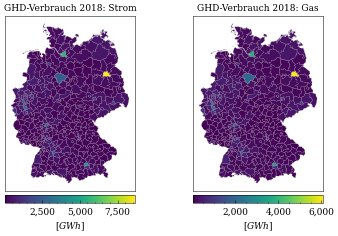

In [94]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="03_CTS_Consumption"


fig, ax = plot.choropleth_map(df_geoplot['GHD']/1000, relative=False, unit='GWh', axtitle='GHD-Verbrauch 2018:', 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

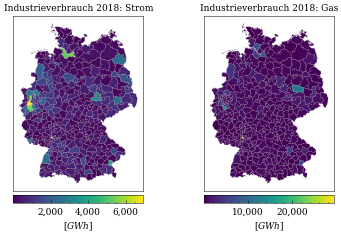

In [95]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="03_Industry_Consumption"


fig, ax = plot.choropleth_map(df_geoplot['Industrie']/1000, relative=False, unit='GWh', axtitle='Industrieverbrauch 2018:', 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

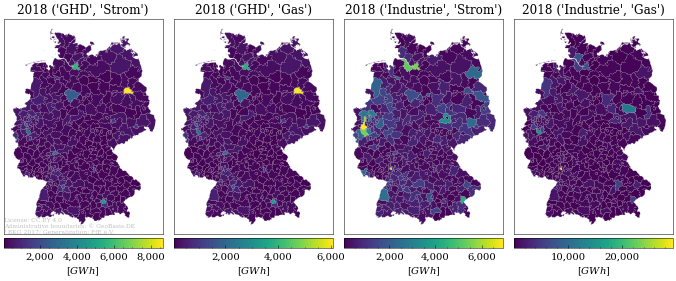

In [24]:
ec_combined = pd.concat([df_geoplot['GHD']/1000, df_geoplot['Industrie']/1000], keys=['GHD', 'Industrie'], axis=1, join='inner')
w_cm=24
w_in=w_cm/2.5
fig_name="03_Combined.svg"


fig, ax = plot.choropleth_map(df_geoplot/1000, relative=False, unit='GWh', axtitle='2018', 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=10, linewidth=0.1, ncols=4, nrows=1)

#plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

### 04 zeitlich aufgelöst

In [40]:
df_strom_cts = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_strom_cts_2018.csv", header=[0], index_col=[0])
df_gas_cts = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_gas_cts_2018.csv", header=[0], index_col=[0])

df_strom_ind = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_strom_industry_2018.csv", header=[0], index_col=[0])
df_gas_ind = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_gas_industry_2018.csv", header=[0], index_col=[0])
df_gas_ind_with_KO = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_gas_industry_2018_with_KO.csv", header=[0], index_col=[0])


In [41]:
df_strom_cts.index = pd.to_datetime(df_strom_cts.index)
df_strom_cts.columns = df_strom_cts.columns.astype(int)

df_gas_cts.index = pd.to_datetime(df_gas_cts.index)
df_gas_cts.columns = df_gas_cts.columns.astype(int)

df_strom_ind.index = pd.to_datetime(df_strom_ind.index)
df_strom_ind.columns = df_strom_ind.columns.astype(int)

df_gas_ind.index = pd.to_datetime(df_gas_ind.index)
df_gas_ind.columns = df_gas_ind.columns.astype(int)

df_gas_ind_with_KO.index = pd.to_datetime(df_gas_ind_with_KO.index)
df_gas_ind_with_KO.columns = df_gas_ind_with_KO.columns.astype(int)

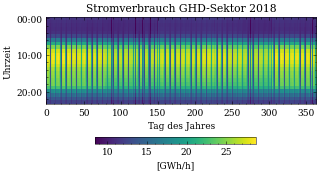

In [983]:
new_df=pd.DataFrame()
new_df['Stromverbrauch GHD-Sektor 2018'] = df_strom_cts.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Strom_CTS_Year_2018.svg')

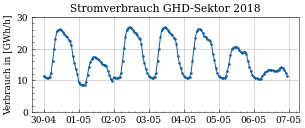

In [22]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Stromverbrauch GHD-Sektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,30), rot=0, fig_name='04_Lastgang_Strom_CTS_Woche_18')


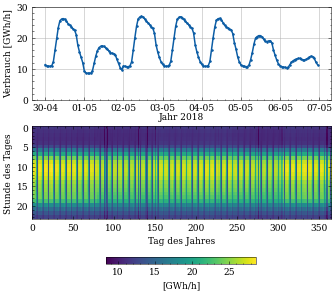

In [18]:
new_df=pd.DataFrame()
new_df['Stromverbrauch GHD 2018 in [GWh/h]'] = df_strom_cts.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,30)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)

#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Strom_cts_combined.svg")

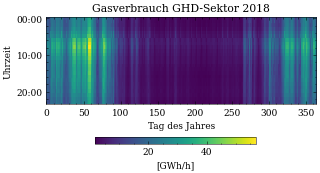

In [984]:
new_df=pd.DataFrame()
new_df['Gasverbrauch GHD-Sektor 2018'] = df_gas_cts.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Gas_CTS_Year_2018.svg')

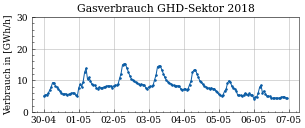

In [31]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Gasverbrauch GHD-Sektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,30), rot=0, fig_name='04_Lastgang_Gas_CTS_Woche_18')


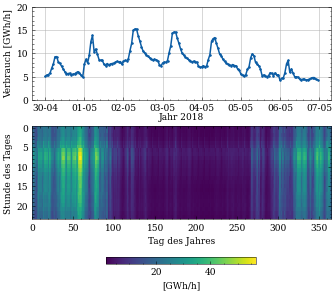

In [12]:
new_df=pd.DataFrame()
new_df['Gasverbrauch GHD 2018 in [GWh/h]'] = df_gas_cts.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,20)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)


#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Gas_cts_combined.svg")

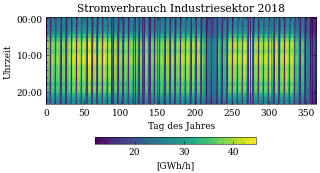

In [985]:
new_df=pd.DataFrame()
new_df['Stromverbrauch Industriesektor 2018'] = df_strom_ind.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Strom_Industry_Year_2018.svg')

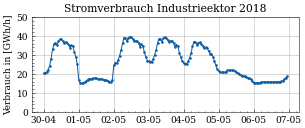

In [37]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Stromverbrauch Industrieektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,50), rot=0, fig_name='04_Lastgang_Strom_Industry_Woche_18')


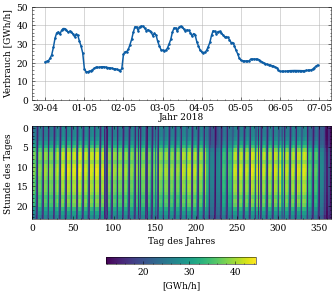

In [13]:
new_df=pd.DataFrame()
new_df['Stromverbrauch Industrie 2018 in [GWh/h]'] = df_strom_ind.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,50)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)

#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Strom_Industrie_combined.svg")

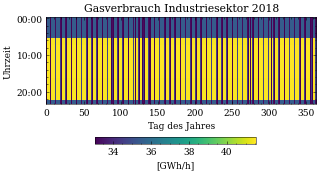

In [986]:
new_df=pd.DataFrame()
new_df['Gasverbrauch Industriesektor 2018'] = df_gas_ind.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Gas_Industry_Year_2018.svg')

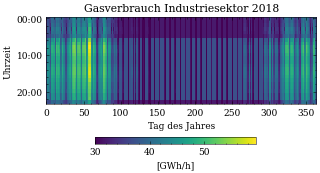

In [42]:
new_df=pd.DataFrame()
new_df['Gasverbrauch Industriesektor 2018'] = df_gas_ind_with_KO.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Gas_Industry_Year_2018_with_KO.svg')

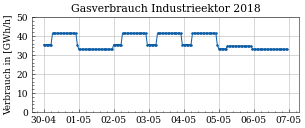

In [39]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Gasverbrauch Industrieektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,50), rot=0, fig_name='04_Lastgang_Gas_Industry_Woche_18')


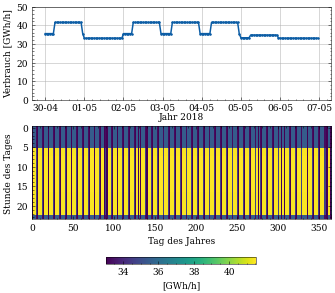

In [14]:
new_df=pd.DataFrame()
new_df['Stromverbrauch Industrie 2018 in [GWh/h]'] = df_gas_ind.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,50)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)

#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Gas_Industrie_combined.svg")

### 05 top je LK

In [105]:
df_geoplot = pd.read_csv('./data_out/Diss/03_results_regio_2018.csv', header=[0,1], index_col=[0])
df_geoplot.rename(columns={'CTS': 'GHD', "power": "Strom", "industry" : "Industrie", "gas" : "Gas"}, inplace=True)

In [124]:
index_slice = pd.IndexSlice
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')

df_geoplot.loc[:, index_slice[:,'Strom']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
big_power_idx= df_geoplot.loc[:, index_slice[:,'Strom']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict).index

In [157]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
new_df = df_geoplot_strom.rename(index=region_dict).loc[big_power_idx]#.sort_values(by="Größter Stromverbrauch [MWh]", ascending=False).head(10).plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47
new_df['Stromverbrauch Landkreis [MWh]'] = df_geoplot.loc[:, index_slice[:,'Strom']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
new_df.replace(config.dict_wz(), inplace=True)
new_df.to_excel("./data_out/Diss/05_Top10_WZ_Elec.xlsx")

In [129]:
index_slice = pd.IndexSlice
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')

df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
big_gas_idx = df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict).index

In [135]:
df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)


Ludwigshafen am Rhein, Kreisfreie Stadt    2.975738e+07
Köln, Kreisfreie Stadt                     1.704944e+07
Wittenberg                                 1.212039e+07
Hamburg                                    1.121352e+07
Steinburg                                  7.404471e+06
Berlin                                     7.369780e+06
Kelheim                                    5.825761e+06
Rheinisch-Bergischer Kreis                 5.765383e+06
Altötting                                  5.686231e+06
Recklinghausen                             5.417154e+06
dtype: float64

In [146]:
config.dict_wz()

{1: 'Landwirtschaft',
 2: 'Forstwirtschaft',
 3: 'Fischerei',
 5: 'Kohlenbergbau',
 6: 'Öl & Gas',
 7: 'Erzbergbau',
 8: 'Steine & Erden',
 9: 'Dienstleistg. Bergbau',
 10: 'Nahrungsindustrie',
 11: 'Getränkeherstellung',
 12: 'Tabakverarbeitung',
 13: 'Textilien',
 14: 'Bekleidung',
 15: 'Lederwaren & Schuhe',
 16: 'Holzverarbeitung',
 17: 'Papierindustrie',
 18: 'Medien',
 19: 'Kokerei & Mineralöl',
 20: 'Chemie',
 21: 'Pharma',
 22: 'Gummi & Kunststoffe',
 23: 'Glas & Keramik',
 24: 'Metallerzeugung',
 25: 'Metallerzeugnisse',
 26: 'Elektronik & IT',
 27: 'Elektrische Ausrüst.',
 28: 'Maschinenbau',
 29: 'Fahrzeugbau',
 30: 'Sonstiger Fahrzeugbau',
 31: 'Möbeln',
 32: 'Herstellung Sonstiges',
 33: 'Reparatur Maschinen+Anl.',
 35: 'Energieversorgung',
 36: 'Wasserversorgung',
 37: 'Abwasserentsorgung',
 38: 'Abfallbeseitigung',
 39: 'Entsorgung',
 41: 'Hochbau',
 42: 'Tiefbau',
 43: 'Vorb. Baustellenarbeiten',
 45: 'Kfz-Handel',
 46: 'Großhandel',
 47: 'Einzelhandel',
 49: 'Landverke

In [170]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
new_df= df_geoplot_gas.rename(index=region_dict).loc[big_gas_idx]#.sort_values(by="Größter Gasverbrauch [MWh]", ascending=False).head(10)#.plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47
new_df['Gasverbrauch Landkreis [MWh]'] = df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
new_df.replace(config.dict_wz(), inplace=True)
new_df.to_excel("./data_out/Diss/05_Top10_WZ_Gas.xlsx")
new_df

#plt.bar_label(splot.containers[0])


#plt.figure(figsize=(8, 6))
#bplot=new_df.plot(kind='bar') 
#plt.xlabel("Continent", size=16)
#plt.ylabel("LifeExp", size=16)
#plt.bar_label()


#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

,Größter Gasverbrauch [MWh],WZ,Gasverbrauch Landkreis [MWh]
"Ludwigshafen am Rhein, Kreisfreie Stadt",2.808248e+07,Chemie,2.975738e+07
"Köln, Kreisfreie Stadt",6.017444e+06,Chemie,1.704944e+07
Wittenberg,6.347221e+06,Chemie,1.212039e+07
Hamburg,2.857273e+06,Kokerei & Mineralöl,1.121352e+07
Steinburg,1.328455e+06,Glas & Keramik,7.404471e+06
Berlin,9.184824e+05,Erziehung u.Unterricht,7.369780e+06
Kelheim,1.912335e+06,Kokerei & Mineralöl,5.825761e+06
Rheinisch-Bergischer Kreis,1.233735e+06,Nahrungsindustrie,5.765383e+06
Altötting,5.164047e+06,Chemie,5.686231e+06
Recklinghausen,1.652720e+06,Kokerei & Mineralöl,5.417154e+06


In [166]:
for k, v in new_df.iterrows():
    #print(k)
    print(v[1])

Chemie
Chemie
Chemie
Kokerei & Mineralöl
Glas & Keramik
Erziehung u.Unterricht
Kokerei & Mineralöl
Nahrungsindustrie
Chemie
Kokerei & Mineralöl


In [101]:
df_geoplot_strom = pd.read_csv('./data_out/Diss/05_results_regio_power_2018.csv', header=[0], index_col=[0])
#df_geoplot.rename(columns={'CTS': 'GHD', "power": "Strom", "industry" : "Industrie", "gas" : "Gas"}, inplace=True)

In [123]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
df_geoplot_strom.rename(index=region_dict)#.sort_values(by="Größter Stromverbrauch [MWh]", ascending=False).head(10).plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47

,Größter Stromverbrauch [MWh],WZ
"Flensburg, Kreisfreie Stadt",35775.697968,47
"Kiel, Kreisfreie Stadt",68295.874765,47
"Lübeck, Kreisfreie Stadt",62958.484066,47
"Neumünster, Kreisfreie Stadt",27609.757293,49
Dithmarschen,403089.448284,20
...,...,...
Saalfeld-Rudolstadt,141546.430115,20
Saale-Holzland-Kreis,53972.844574,24
Saale-Orla-Kreis,123744.288759,22
Greiz,34390.071777,20


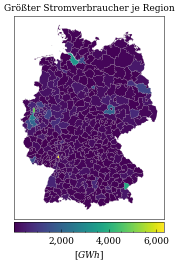

In [22]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="test"


fig, ax = plot.choropleth_map(df_geoplot['Größter Stromverbrauch [MWh]']/1000, relative=False, unit='GWh', axtitle='Größter Stromverbraucher je Region',
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

#plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

In [80]:
df_geoplot_gas = pd.read_csv('./data_out/Diss/05_results_regio_gas_2018.csv', header=[0], index_col=[0])


In [99]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
df_geoplot_gas.rename(index=region_dict).sort_values(by="Größter Gasverbrauch [MWh]", ascending=False).head(10)#.plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47

,Größter Gasverbrauch [MWh],WZ
"Ludwigshafen am Rhein, Kreisfreie Stadt",2.808248e+07,20
Wittenberg,6.347221e+06,20
"Köln, Kreisfreie Stadt",6.017444e+06,20
Altötting,5.164047e+06,20
Stade,3.541600e+06,20
Hamburg,2.857273e+06,19
"Duisburg, Kreisfreie Stadt",2.450364e+06,24
Saalekreis,2.184582e+06,20
Kelheim,1.912335e+06,19
"Krefeld, Kreisfreie Stadt",1.820767e+06,20


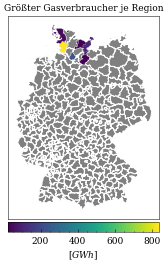

In [26]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="test"


fig, ax = plot.choropleth_map((df_geoplot_gas['Größter Gasverbrauch [MWh]']/1000).head(10), relative=False, unit='GWh', axtitle='Größter Gasverbraucher je Region',
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

#plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

### 07 Anwendungen

In [301]:
df_app_strom_cts = pd.read_csv("./data_out/Diss/07_results_Anwendungen_WZ_2018_CTS_power.csv", header=[0], index_col=[0])
df_app_gas_cts = pd.read_csv("./data_out/Diss/07_results_Anwendungen_WZ_2018_CTS_gas.csv", header=[0], index_col=[0])

df_app_strom_ind = pd.read_csv("./data_out/Diss/07_results_Anwendungen_WZ_2018_industry_power.csv", header=[0], index_col=[0])
df_app_gas_ind = pd.read_csv("./data_out/Diss/07_results_Anwendungen_WZ_2018_industry_gas.csv", header=[0], index_col=[0])

In [356]:
new_df_app = pd.concat([df_app_strom_cts, df_app_strom_ind])
new_df_plot = new_df_app.assign(sum=new_df_app.sum(axis=1)).sort_values(by='sum', ascending=False).iloc[:,:-1].head(10).rename(index=config.dict_wz())
new_df_plot.rename(columns={"Mechanische \nEnergie" : "Mechan. Energie"}, inplace=True)

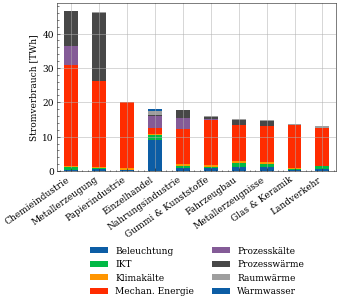

In [357]:
plot_bar(new_df_plot/1000000,
        ncol=2, loc='upper center', coords=[0.5, -0.4], ylabel='Stromverbrauch [TWh]', rot=35, fig_name='07_Top_10_Strom_Anwendung')#.plot(kind='bar', stacked=True) ,coords=[0.5, -0.08]coords=[0.5, -0.35]

In [359]:
df_app_gas_ind_2 = df_app_gas_ind.assign(Prozesswärme=df_app_gas_ind[['Prozesswärme >500°C', 'Prozesswärme 100°C-200°C', 'Prozesswärme 200°C-500°C', 'Prozesswärme <100°C']].sum(axis=1))#
new_df_app = pd.concat([df_app_gas_cts, df_app_gas_ind_2]).iloc[:, :-4].fillna(0)
new_df_plot = new_df_app.assign(sum=new_df_app.sum(axis=1)).sort_values(by='sum', ascending=False).head(10).rename(index=config.dict_wz()).iloc[:, :-1]
new_df_plot.rename(columns={"Mechanische \nEnergie" : "Mechan. Energie", "Nichtenergetischer Erdgasverbrauch" : "Nichtenerget. Verbrauch",
                           "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)

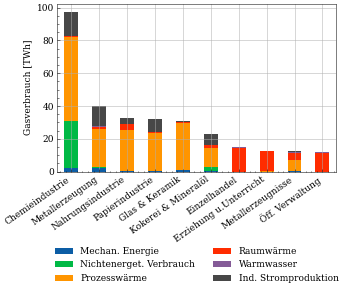

In [363]:
plot_bar(new_df_plot/1000000,
        ncol=2, loc='upper center', coords=[0.5, -0.4], ylabel='Gasverbrauch [TWh]', rot=35, fig_name='07_Top_10_Gas_Anwendung')#.plot(kind='bar', stacked=True) ,coords=[0.5, -0.08]

In [362]:
def plot_bar(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', stacked=True, ylim=None, xlim=None, loc=None, ncol=None, coords=None, fs=9, fig_name=None, lw=1, rot=0):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha='right')
    ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax.set_title(title)

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

### 08 After fuel switch - Anwendungen

In [29]:
df_app_gas_rep_app = pd.read_csv("./data_out/Diss/10_results_sectors_gas_replaced_by_elec_applications_years.csv", header=[0,1], index_col=[0])
col_slice = pd.IndexSlice

In [30]:
df_app_gas_rep_app_cts = df_app_gas_rep_app.loc[:, col_slice[:,'CTS']].iloc[:, 1:-1].dropna().droplevel(1, axis=1)
df_app_gas_rep_app_cts.columns=df_app_gas_rep_app_cts.columns.astype(int)

df_app_gas_rep_app_cts

Jahre,2020,2025,2030,2035,2040,2045
Mechanische Energie,1.185482e+06,2.012378e+06,2.565413e+06,2.910632e+06,3.373030e+06,3.756466e+06
Prozesswärme,8.331576e+05,1.681362e+06,2.550815e+06,3.449152e+06,4.403504e+06,5.407903e+06
Raumwärme,1.628486e+07,2.919003e+07,3.929398e+07,4.707946e+07,5.643145e+07,6.501549e+07
Warmwasser,8.848185e+05,1.593070e+06,2.154265e+06,2.591747e+06,3.119530e+06,3.609121e+06


In [48]:
df_app_gas_rep_app_ind = df_app_gas_rep_app.loc[:, col_slice[:,'industry']].iloc[:, 1:-1].dropna().droplevel(1, axis=1)
df_app_gas_rep_app_ind.columns=df_app_gas_rep_app_ind.columns.astype(int)

df_app_gas_rep_app_ind.rename(index={"Mechanische Energie" : "Mechanische Energie", "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)
df_app_gas_rep_app_ind

Jahre,2020,2025,2030,2035,2040,2045
Ind. Stromproduktion,8.621343e+06,1.706322e+07,2.536677e+07,3.343130e+07,4.169288e+07,4.966133e+07
Mechanische Energie,1.218540e+06,2.222835e+06,3.043864e+06,3.757757e+06,4.578581e+06,5.289483e+06
Prozesswärme 100°C-200°C,5.498451e+06,1.048116e+07,1.501111e+07,1.957043e+07,2.453729e+07,2.901782e+07
Prozesswärme <100°C,5.083944e+06,9.695489e+06,1.387136e+07,1.779462e+07,2.194073e+07,2.590050e+07
Raumwärme,5.015071e+06,9.057352e+06,1.229270e+07,1.495629e+07,1.818937e+07,2.104755e+07
Warmwasser,4.531585e+05,8.203906e+05,1.116027e+06,1.358658e+06,1.653673e+06,1.914967e+06


In [32]:
# repair data
df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2020.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2020.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2020 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2025.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2025.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2025 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2030.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2030.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2030 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2035.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2035.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2035 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_2040 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_2040.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_2045 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = pd.concat([df_app_elc_on_top_app_2020, df_app_elc_on_top_app_2025, df_app_elc_on_top_app_2030,
                                         df_app_elc_on_top_app_2035, df_app_elc_on_top_app_2040, df_app_elc_on_top_app_2045], axis=1)
df_app_elc_on_top_app = df_app_elc_on_top_app_state.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app.columns=df_app_elc_on_top_app.columns.astype(int)
df_app_elc_on_top_app

Jahre,2020,2025,2030,2035,2040,2045
Mechanische Energie,5.578737e+05,9.470015e+05,1.207253e+06,1.369709e+06,1.587308e+06,1.767749e+06
Prozesswärme,3.797493e+05,7.745771e+05,1.139317e+06,1.568804e+06,2.010378e+06,2.466968e+06
Raumwärme,4.070353e+06,7.524623e+06,9.932439e+06,1.195218e+07,1.440640e+07,1.658660e+07
Warmwasser,2.886939e+05,5.269779e+05,6.889969e+05,8.438621e+05,1.020805e+06,1.179737e+06


In [45]:
df_app_elc_on_top_app_2020_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2020.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2025_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2025.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2030_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2030.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2035_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2035.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2040_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2040.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = pd.concat([df_app_elc_on_top_app_2020_ind, df_app_elc_on_top_app_2025_ind, df_app_elc_on_top_app_2030_ind,
                                         df_app_elc_on_top_app_2035_ind, df_app_elc_on_top_app_2040_ind, df_app_elc_on_top_app_2045_ind], axis=1)
df_app_elc_on_top_app_ind = df_app_elc_on_top_app_state.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app_ind.rename(index={"Mechanische Energie" : "Mechanische Energie", "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)
df_app_elc_on_top_app_ind

Jahre,2020,2025,2030,2035,2040,2045
Ind. Stromproduktion,3.017470e+06,5.972126e+06,8.878368e+06,1.170095e+07,1.459251e+07,1.738147e+07
Mechanische Energie,5.734307e+05,1.046040e+06,1.432406e+06,1.768356e+06,2.154626e+06,2.489168e+06
Prozesswärme 100°C-200°C,3.625105e+06,6.962016e+06,9.782046e+06,1.288904e+07,1.620311e+07,1.915381e+07
Prozesswärme <100°C,2.755253e+06,5.285058e+06,7.382441e+06,9.611709e+06,1.189563e+07,1.402068e+07
Raumwärme,1.272220e+06,2.384957e+06,3.159537e+06,3.860655e+06,4.740285e+06,5.471650e+06
Warmwasser,1.471849e+05,2.700412e+05,3.546850e+05,4.399781e+05,5.385309e+05,6.232573e+05


In [34]:
test = pd.read_csv("./data_out/Diss/12_results_elec_from_switch_industry_wz_2045.csv", header=[0,1], index_col=[0])#.dropna()
test.sum().sum()

59140032.38005691

In [35]:
def plot_div_bar(df_gas, df_el, w_cm=14, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=0, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40]):
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, ax1 = plt.subplots(figsize=(w_in,(w_in/(1.618))))
    #ax1.axhspan(0, 40, facecolor='0.9', alpha=0.5)
    #ax1.axhspan(-80, 0, facecolor='0.6', alpha=0.5)
    
    ax2 = ax1.twinx()
    
    positive_data.plot(ax=ax1, kind='bar', stacked=True, width=-0.35, align='edge' ) # width=0.5, align='center'
    negative_data.plot(ax=ax2, kind='bar', stacked=True, width=(0.35), align='edge'  ) #width=-0.5, align='center'
    
    ax1.grid(True)
    ax2.grid(True)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax1.set_ylabel(ylabel1)
    ax2.set_ylabel(ylabel2)
    ax1.set_xlabel(xlabel)
    
    ax1.set_ylim(ylim1)
    ax1.set_xlim([-0.5, 5.5])
    ax2.set_ylim(ylim2)
    
    ax1.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax2.legend().remove()
    
    yticks = ax1.yaxis.get_major_ticks()
    ymrange = range(0,4)
    for t in ymrange:
        yticks[t].set_visible(False)
    
    yticksm = ax1.yaxis.get_minor_ticks()
    ymrange = range(0,12)
    for t in ymrange:
        yticksm[t].set_visible(False)
    
    
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].set_visible(False)
    yticks[-2].set_visible(False)
    
    yticksm = ax2.yaxis.get_minor_ticks()
    ymrange = range(-6,0,1)
    for t in ymrange:
        yticksm[t].set_visible(False)
    
    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

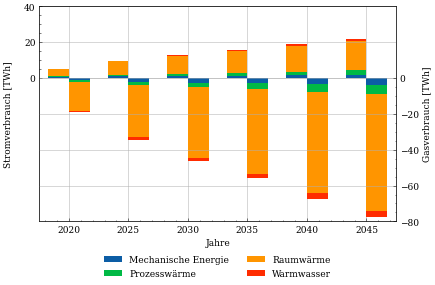

In [973]:
plot_div_bar(df_app_gas_rep_app_cts, df_app_elc_on_top_app, xlabel='Jahre', w_cm=16, ylabel1="Stromverbrauch [TWh]", ylabel2="Gasverbrauch [TWh]")

In [36]:
def double_bar_plot(df_gas, df_el, w_cm=14, fs=9, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=90, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40], title1=None, title2=None):
    
    plt.rcParams.update({'font.size':fs})
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(w_in,(w_in/(1.618))))
    positive_data.plot(ax=ax1, kind='bar', stacked=True)
    negative_data.plot(ax=ax2, kind='bar', stacked=True)
    
    ax2.legend().remove()
    ax1.legend().remove()
    
    ax1.set_ylim(ylim1)
    ax2.set_ylim(ylim2)

    ax1.grid(True)
    ax2.grid(True)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax2.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    
    ax1.set_title(title1, fontsize=fs)
    ax2.set_title(title2, fontsize=fs)
    
    ax1.set_ylabel(ylabel1, fontsize=fs)
    ax2.set_ylabel(ylabel2, fontsize=fs)
    ax1.set_xlabel(xlabel)
    plt.tight_layout()
    plt.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    
    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

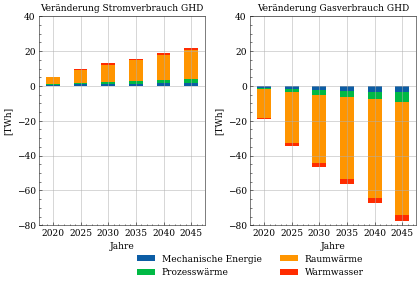

In [42]:
double_bar_plot(df_app_gas_rep_app_cts, df_app_elc_on_top_app,  w_cm=15, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Veränderung Stromverbrauch GHD', title2='Veränderung Gasverbrauch GHD', fig_name='10_gas_replaced_elec_on_top_cts')

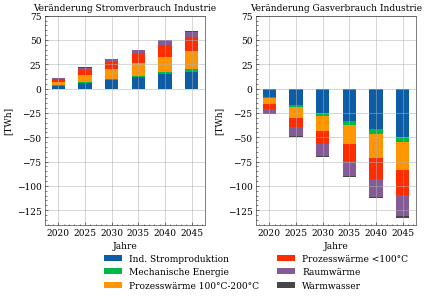

In [49]:
double_bar_plot(df_app_gas_rep_app_ind, df_app_elc_on_top_app_ind,  w_cm=15, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Veränderung Stromverbrauch Industrie', title2='Veränderung Gasverbrauch Industrie', fig_name='10_gas_replaced_elec_on_top_industry',
               ylim1=(-140,75),  ylim2=(-140,75))

In [54]:
df_app_gas_rep_hydro_app_gas

Jahre,2020,2025,2030,2035,2040,2045
Prozesswärme 100°C-200°C,4.768330e+06,9.060520e+06,1.293214e+07,1.693399e+07,2.135278e+07,2.516922e+07
Prozesswärme 200°C-500°C,2.809950e+06,5.346670e+06,7.646067e+06,9.939032e+06,1.244716e+07,1.472295e+07
Prozesswärme >500°C,1.387062e+07,2.660504e+07,3.827104e+07,4.944556e+07,6.143491e+07,7.274869e+07
Nichtenergetischer Erdgasverbrauch,5.365356e+06,1.090166e+07,1.661403e+07,2.250383e+07,2.857831e+07,3.507921e+07


In [55]:
df_app_gas_rep_hydro_app_hydro

Jahre,2020,2025,2030,2035,2040,2045
Prozesswärme 100°C-200°C,4.768330e+06,9.060520e+06,1.293214e+07,1.693399e+07,2.135278e+07,2.516922e+07
Prozesswärme 200°C-500°C,2.809950e+06,5.346670e+06,7.646067e+06,9.939032e+06,1.244716e+07,1.472295e+07
Prozesswärme >500°C,1.387062e+07,2.660504e+07,3.827104e+07,4.944556e+07,6.143491e+07,7.274869e+07
Nichtenergetischer Erdgasverbrauch,3.755749e+06,7.631161e+06,1.162982e+07,1.575268e+07,2.000482e+07,2.455545e+07


In [52]:
df_app_gas_rep_hydro_app = pd.read_csv("./data_out/Diss/18_results_gas_replaced_hydro_industry_apps_years.csv", header=[0,1], index_col=[0])
col_slice = pd.IndexSlice

In [53]:
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1)
df_app_gas_rep_hydro_app_hydro = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1)

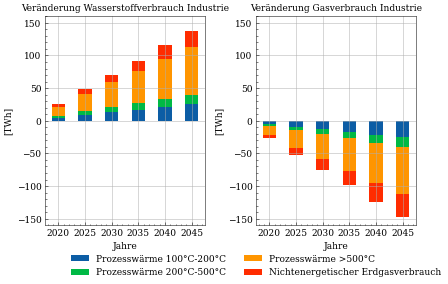

In [1045]:
double_bar_plot(df_app_gas_rep_hydro_app_gas, df_app_gas_rep_hydro_app_hydro,  w_cm=15, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Veränderung Wasserstoffverbrauch Industrie', title2='Veränderung Gasverbrauch Industrie', fig_name='18_gas_replaced_hydro_on_top_industry',
               ylim1=(-160,160),  ylim2=(-160,160))

In [1044]:
df_app_gas_rep_hydro_elec_app = pd.read_csv("./data_out/Diss/19_results_electrolysis_industry_apps_years.csv", header=[0,1], index_col=[0])
col_slice = pd.IndexSlice
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1)
df_app_gas_rep_hydro_app_hydro_elec = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1)

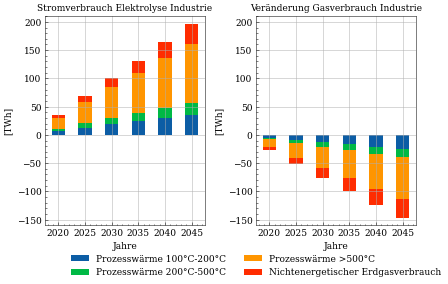

In [1056]:
double_bar_plot(df_app_gas_rep_hydro_app_gas, df_app_gas_rep_hydro_app_hydro_elec/0.7,  w_cm=15, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Stromverbrauch Elektrolyse Industrie', title2='Veränderung Gasverbrauch Industrie', fig_name='19_gas_replaced_hydro_elec_on_top_industry',
               ylim1=(-160,210),  ylim2=(-160,210))

### 09 after fuel - switch absolut

In [113]:
col_slice = pd.IndexSlice
df_gesamt_no_switch = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])

# for gas to be rep
df_app_gas_rep_el_app = pd.read_csv("./data_out/Diss/10_results_sectors_gas_replaced_by_elec_applications_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app = pd.read_csv("./data_out/Diss/18_results_gas_replaced_hydro_industry_apps_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1)

# elec on top industry
df_app_elc_on_top_app_2020_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2020.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2025_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2025.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2030_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2030.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2035_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2035.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2040_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2040.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = pd.concat([df_app_elc_on_top_app_2020_ind, df_app_elc_on_top_app_2025_ind, df_app_elc_on_top_app_2030_ind,
                                         df_app_elc_on_top_app_2035_ind, df_app_elc_on_top_app_2040_ind, df_app_elc_on_top_app_2045_ind], axis=1)
df_app_elc_on_top_app_ind = df_app_elc_on_top_app_state.groupby(level=0, axis=1).sum()
#df_app_elc_on_top_app_ind.rename(index={"Mechanische Energie" : "Mechan. Energie", "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)

# elec on top CTS
# repair data
df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2020.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2020.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2020 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2025.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2025.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2025 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2030.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2030.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2030 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2035.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2035.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2035 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_2040 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_2040.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_2045 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = pd.concat([df_app_elc_on_top_app_2020, df_app_elc_on_top_app_2025, df_app_elc_on_top_app_2030,
                                         df_app_elc_on_top_app_2035, df_app_elc_on_top_app_2040, df_app_elc_on_top_app_2045], axis=1)
df_app_elc_on_top_app = df_app_elc_on_top_app_state.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app.columns=df_app_elc_on_top_app.columns.astype(int)


# hydro on top
df_app_gas_rep_hydro_app_hydro = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1)

# elec on top elektrolysers
df_app_gas_rep_hydro_app_elektrolysers = df_app_gas_rep_hydro_app_hydro/0.7


In [114]:
# cts
new_df = pd.DataFrame()
# gas no switch
new_df['Gas no switch'] = df_gesamt_no_switch['CTS', 'gas']
new_df

# gas rep by el
series_gas_rep_el = df_app_gas_rep_el_app.loc[:, col_slice[:,'CTS']].iloc[:, 1:-1].dropna().droplevel(1, axis=1).sum()  # rep by elec
series_gas_rep_el.index = series_gas_rep_el.index.astype(int)
new_df['Gas rep by el'] =series_gas_rep_el  # rep by elec

# gas rep abs
new_df['Gasverbrauch'] = (new_df['Gas no switch'] - new_df['Gas rep by el'])
new_df.dropna(inplace=True)

# elec no switch
new_df['Power no switch'] = df_gesamt_no_switch['CTS', 'power']

# power on top from switch
series_elec_on_top = df_app_elc_on_top_app.sum()
series_elec_on_top.index = series_elec_on_top.index.astype(int)
new_df['Power on top from switch'] = series_elec_on_top

# power absolut switch only no elektrolysers
new_df['Stromverbrauch'] =(new_df['Power no switch'] + new_df['Power on top from switch'])
new_df_cts = new_df

In [176]:
new_df_cts/1000000

,Gas no switch,Gas rep by el,Gasverbrauch,Power no switch,Power on top from switch,Stromverbrauch
2020,115.129901,19.188317,95.941584,157.062508,5.296670,162.359178
2025,103.430509,34.476836,68.953673,141.711996,9.773179,151.485175
2030,93.128943,46.564471,46.564471,128.645762,12.968005,141.613767
2035,84.046493,56.030995,28.015498,117.507436,15.734560,133.241996
2040,80.793012,67.327510,13.465502,113.386355,19.024895,132.411249
2045,77.788975,77.788975,0.000000,109.717729,22.001054,131.718783


In [142]:
# industry
new_df = pd.DataFrame()
# gas no switch
new_df['Gas no switch'] = df_gesamt_no_switch['industry', 'gas']

# gas rep by el
series_gas_rep_el = df_app_gas_rep_el_app.loc[:, col_slice[:,'industry']].iloc[:, 1:-1].dropna().droplevel(1, axis=1).sum()  # rep by elec
series_gas_rep_el.index = series_gas_rep_el.index.astype(int)
new_df['Gas rep by el'] =series_gas_rep_el  # rep by elec
# gas rep by hydro
series_gas_rep_hydro = df_app_gas_rep_hydro_app_gas.sum()
series_gas_rep_hydro.index = series_gas_rep_hydro.index.astype(int)
new_df['Gas rep by hydro'] =series_gas_rep_hydro  # rep by hydro
# gas rep abs
new_df['Gasverbrauch'] = (new_df['Gas no switch'] - new_df['Gas rep by el']-new_df['Gas rep by hydro'])
new_df.dropna(inplace=True)

# elec no switch
new_df['Power no switch'] = df_gesamt_no_switch['industry', 'power']

# power on top from switch
series_elec_on_top = df_app_elc_on_top_app_ind.sum()
series_elec_on_top.index = series_elec_on_top.index.astype(int)
new_df['Power on top from switch'] = series_elec_on_top
# power absolut switch only no elektrolysers
new_df['Stromverbrauch \n(keine Elektrolyse)'] =(new_df['Power no switch'] + new_df['Power on top from switch'])

# power on top from electrolyis
series_power_elektrolysers = df_app_gas_rep_hydro_app_elektrolysers.sum()
series_power_elektrolysers.index = series_power_elektrolysers.index.astype(int)
new_df['Power on top from elektrolysis'] = series_power_elektrolysers
# power absolut switch only with elektrolysers
new_df['Stromverbrauch \n(100% Elektrolyse)'] =(new_df['Power no switch'] + new_df['Power on top from switch'] + new_df['Power on top from elektrolysis'])

# hydrogen on top
series_hydrogen = df_app_gas_rep_hydro_app_hydro.sum()
series_hydrogen.index = series_hydrogen.index.astype(int)
new_df['Wasserstoffverbrauch'] = series_hydrogen


In [143]:
new_df/1000000

,Gas no switch,Gas rep by el,Gas rep by hydro,Gasverbrauch,Power no switch,Power on top from switch,Stromverbrauch \n(keine Elektrolyse),Power on top from elektrolysis,Stromverbrauch \n(100% Elektrolyse),Wasserstoffverbrauch
2020,316.228617,25.890508,26.814261,2.635238e+02,229.961809,11.390663,241.352472,36.006649,277.359121,25.204654
2025,303.762985,49.340439,51.913889,2.025087e+02,212.770025,21.920238,234.690263,69.490559,304.180823,48.643392
2030,292.330210,70.701835,75.463270,1.461651e+02,196.753772,30.989483,227.743255,100.684374,328.427629,70.479062
2035,284.537185,90.869047,98.822410,9.484573e+01,186.358274,40.270692,226.628965,131.530372,358.159338,92.071261
2040,283.686826,112.592524,123.813165,4.728114e+01,184.278162,50.124692,234.402853,164.628102,399.030955,115.239671
2045,280.551725,132.831650,147.720075,5.960464e-14,180.275382,59.140032,239.415414,195.994729,435.410143,137.196310


In [11]:
def plot_bar_grouped(df, w_cm=14, title=None, ylabel='Verbrauch [TWh]', xlabel='', stacked=False, ylim=None, xlim=None, loc='upper center', ncol=2, coords=[0,0], fs=9, fig_name=None, lw=1, rot=0):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha='right')
    ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax.set_title(title)
    #plt.tight_layout()

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

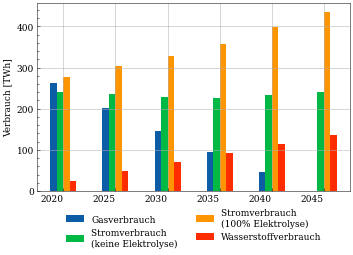

In [16]:
# (new_df['Gasverbrauch absolut']/1000000).plot(kind='bar')
df_plot = new_df[['Gasverbrauch', 'Stromverbrauch \n(keine Elektrolyse)', 'Stromverbrauch \n(100% Elektrolyse)', 'Wasserstoffverbrauch']]/1000000
plot_bar_grouped(df_plot, w_cm=14, coords=[0.5,-0.05], fig_name='16_industry_post_switch')

In [17]:
new_df

,Gas no switch,Gas rep by el,Gas rep by hydro,Gasverbrauch,Power no switch,Power on top from switch,Stromverbrauch \n(keine Elektrolyse),Power on top from elektrolysis,Stromverbrauch \n(100% Elektrolyse),Wasserstoffverbrauch
2020,3.162286e+08,2.589051e+07,2.681426e+07,2.635238e+08,2.299618e+08,1.139066e+07,2.413525e+08,3.600665e+07,2.773591e+08,2.520465e+07
2025,3.037630e+08,4.934044e+07,5.191389e+07,2.025087e+08,2.127700e+08,2.192024e+07,2.346903e+08,6.949056e+07,3.041808e+08,4.864339e+07
2030,2.923302e+08,7.070184e+07,7.546327e+07,1.461651e+08,1.967538e+08,3.098948e+07,2.277433e+08,1.006844e+08,3.284276e+08,7.047906e+07
2035,2.845372e+08,9.086905e+07,9.882241e+07,9.484573e+07,1.863583e+08,4.027069e+07,2.266290e+08,1.315304e+08,3.581593e+08,9.207126e+07
2040,2.836868e+08,1.125925e+08,1.238132e+08,4.728114e+07,1.842782e+08,5.012469e+07,2.344029e+08,1.646281e+08,3.990310e+08,1.152397e+08
2045,2.805517e+08,1.328317e+08,1.477201e+08,5.960464e-08,1.802754e+08,5.914003e+07,2.394154e+08,1.959947e+08,4.354101e+08,1.371963e+08


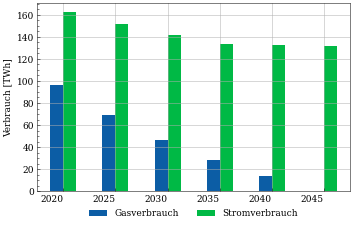

In [ ]:
new_df_cts
# (new_df['Gasverbrauch absolut']/1000000).plot(kind='bar')
df_plot = new_df_cts[['Gasverbrauch', 'Stromverbrauch']]/1000000
plot_bar_grouped(df_plot, w_cm=14, coords=[0.5,-0.05], fig_name='16_cts_post_switch')

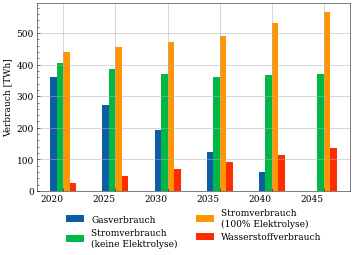

In [66]:
df_plot_1 = new_df[['Gasverbrauch', 'Stromverbrauch \n(keine Elektrolyse)', 'Stromverbrauch \n(100% Elektrolyse)', 'Wasserstoffverbrauch']]/1000000
df_plot_2 = new_df_cts[['Gasverbrauch', 'Stromverbrauch']]/1000000
df_plot_3 = pd.DataFrame()
df_plot_3['Gasverbrauch'] = df_plot_1['Gasverbrauch'].add(df_plot_2['Gasverbrauch'])
df_plot_3['Stromverbrauch \n(keine Elektrolyse)'] = df_plot_1['Stromverbrauch \n(keine Elektrolyse)'].add(df_plot_2['Stromverbrauch'])
df_plot_3['Stromverbrauch \n(100% Elektrolyse)'] = df_plot_1['Stromverbrauch \n(100% Elektrolyse)'].add(df_plot_2['Stromverbrauch'])
df_plot_3['Wasserstoffverbrauch'] = df_plot_1['Wasserstoffverbrauch']

plot_bar_grouped(df_plot_3, w_cm=14, coords=[0.5,-0.05], fig_name='16_cts+industry_post_switch')

### 10 after fuel-switch regional results

In [18]:
col_slice = pd.IndexSlice

# for gas to be rep
df_app_gas_left_after_elec = pd.read_csv("./data_out/Diss/09_cts_industry_gas_left_after_switch_regions_years.csv", header=[0,1], index_col=[0]).groupby(level=0, axis=1).sum()
df_app_gas_left_after_elec.columns = df_app_gas_left_after_elec.columns.astype(int)
df_app_gas_rep_hydro_app = pd.read_csv("./data_out/Diss/18_results_gas_replaced_hydro_industry_regions_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1).rename(config.dict_region_code(keys='ags_lk'), axis=0)
df_app_gas_rep_hydro_app_gas.columns = df_app_gas_rep_hydro_app_gas.columns.astype(int)

# elec before switch
df_elec_before_switch_cts = pd.read_csv("./data_out/Diss/15_cts_electricity_before_switch_years_regions.csv", header=0, index_col=[0])
df_elec_before_switch_ind = pd.read_csv("./data_out/Diss/15_industry_electricity_before_switch_years_regions.csv", header=0, index_col=[0])

df_elec_before_switch = df_elec_before_switch_cts.add(df_elec_before_switch_ind)
df_elec_before_switch.columns = df_elec_before_switch.columns.astype(int)

# elec on top industry
df_app_elc_on_top_app_2020_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2020.csv", header=0, index_col=[0], names=[2020]).dropna()
df_app_elc_on_top_app_2025_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2025.csv", header=0, index_col=[0], names=[2025]).dropna()
df_app_elc_on_top_app_2030_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2030.csv", header=0, index_col=[0], names=[2030]).dropna()
df_app_elc_on_top_app_2035_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2035.csv", header=0, index_col=[0], names=[2035]).dropna()
df_app_elc_on_top_app_2040_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2040.csv", header=0, index_col=[0], names=[2040]).dropna()
df_app_elc_on_top_app_2045_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2045.csv", header=0, index_col=[0], names=[2045]).dropna()

df_app_elc_on_top_app_state_ind = (pd.concat([df_app_elc_on_top_app_2020_ind, df_app_elc_on_top_app_2025_ind, df_app_elc_on_top_app_2030_ind,
                                         df_app_elc_on_top_app_2035_ind, df_app_elc_on_top_app_2040_ind, df_app_elc_on_top_app_2045_ind], axis=1)
                               .rename(config.dict_region_code(keys='ags_lk'), axis=0))

# elec on top CTS
# repair data
df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SH_bis_BY_2020.csv", header=0, index_col=[0], names=[2020])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SL_bis_TH_2020.csv", header=0, index_col=[0], names=[2020])
df_app_elc_on_top_app_2020 = df_app_elc_on_top_app_1.add(df_app_elc_on_top_app_2, axis=1)

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SH_bis_BY_2025.csv", header=0, index_col=[0], names=[2025])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SL_bis_TH_2025.csv", header=0, index_col=[0], names=[2025])
df_app_elc_on_top_app_2025 = df_app_elc_on_top_app_1.add(df_app_elc_on_top_app_2, axis=1)

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SH_bis_BY_2030.csv", header=0, index_col=[0], names=[2030])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SL_bis_TH_2030.csv", header=0, index_col=[0], names=[2030])
df_app_elc_on_top_app_2030 = df_app_elc_on_top_app_1.add(df_app_elc_on_top_app_2, axis=1)

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SH_bis_BY_2035.csv", header=0, index_col=[0], names=[2035])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SL_bis_TH_2035.csv", header=0, index_col=[0], names=[2035])
df_app_elc_on_top_app_2035 = df_app_elc_on_top_app_1.add(df_app_elc_on_top_app_2, axis=1)

df_app_elc_on_top_app_2040 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_2040.csv", header=0, index_col=[0], names=[2040]).dropna()

df_app_elc_on_top_app_2045 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_2045.csv", header=0, index_col=[0], names=[2045]).dropna()

df_app_elc_on_top_app_state_cts = (pd.concat([df_app_elc_on_top_app_2020, df_app_elc_on_top_app_2025, df_app_elc_on_top_app_2030,
                                         df_app_elc_on_top_app_2035, df_app_elc_on_top_app_2040, df_app_elc_on_top_app_2045], axis=1)
                               .rename(config.dict_region_code(keys='ags_lk'), axis=0))


# hydro on top
df_app_gas_rep_hydro_app_hydro = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1).rename(config.dict_region_code(keys='ags_lk'), axis=0)
df_app_gas_rep_hydro_app_hydro.columns = df_app_gas_rep_hydro_app_hydro.columns.astype(int)

# elec on top elektrolysers
df_app_gas_rep_hydro_app_elektrolysers = df_app_gas_rep_hydro_app_hydro/0.7

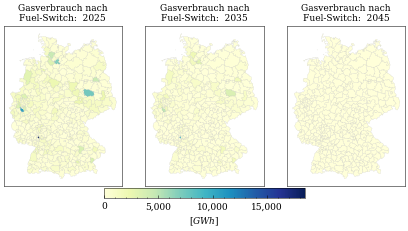

In [74]:
# plot gas abs
df_plot = (df_app_gas_left_after_elec[[2025, 2035, 2045]]).sub(df_app_gas_rep_hydro_app_gas[[2025, 2035,2045]])#.drop('DEB34')

w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_gas_after_switch_years"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Gasverbrauch nach\nFuel-Switch: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='YlGnBu')
plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

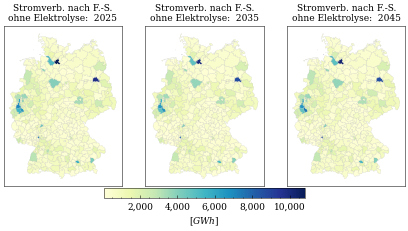

In [75]:
# plot elec abs
years=[2025, 2035, 2045]
df_plot = (df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years])
#df_plot = df_plot.nlargest(25, columns=2045)
w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_no_electrolysis"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Stromverb. nach F.-S.\nohne Elektrolyse: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='YlGnBu')

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

<AxesSubplot:>

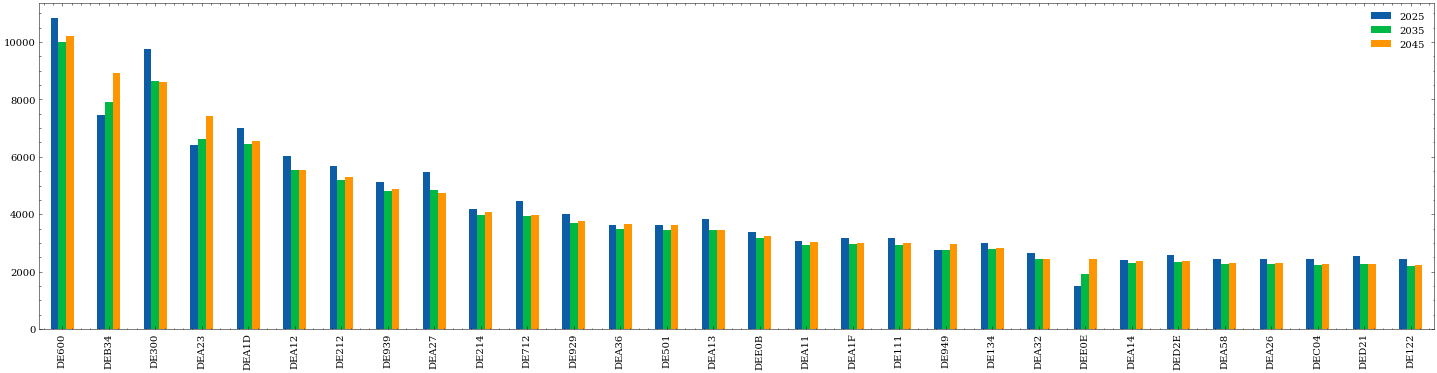

In [67]:
idx = ((df_plot[2045]).nlargest(30)).index
(df_plot.loc[idx]/1000).plot(kind='bar', figsize=(25,6))

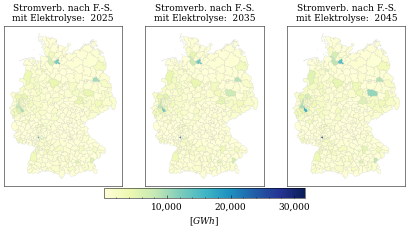

In [76]:
# plot elec abs mit elektrolyse
years=[2025, 2035, 2045]
df_plot = (df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]).add(df_app_gas_rep_hydro_app_elektrolysers[years])
# df_plot = df_plot.nlargest(10, columns=2045)
w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_with_electrolysis"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Stromverb. nach F.-S.\nmit Elektrolyse: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='YlGnBu')

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

<AxesSubplot:>

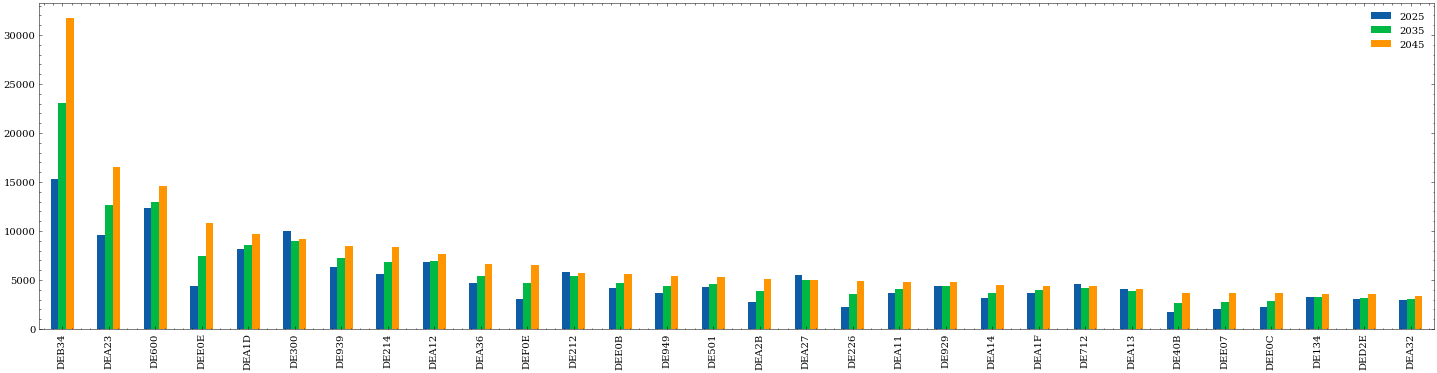

In [69]:
idx = ((df_plot[2045]).nlargest(30)).index
(df_plot.loc[idx]/1000).rename(config.dict_region_code(keys='natcode_nuts3', values='name')).plot(kind='bar', figsize=(25,6))

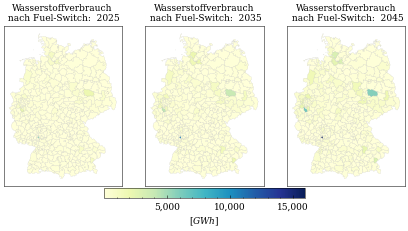

In [77]:
# plothydro
years=[2025, 2035, 2045]
df_plot = (df_app_gas_rep_hydro_app_hydro[years])
#df_plot = df_plot.drop(df_plot.nlargest(1, columns=2045).index)
w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_hydro_after_switch_years"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Wasserstoffverbrauch\n nach Fuel-Switch: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='YlGnBu')

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

<AxesSubplot:>

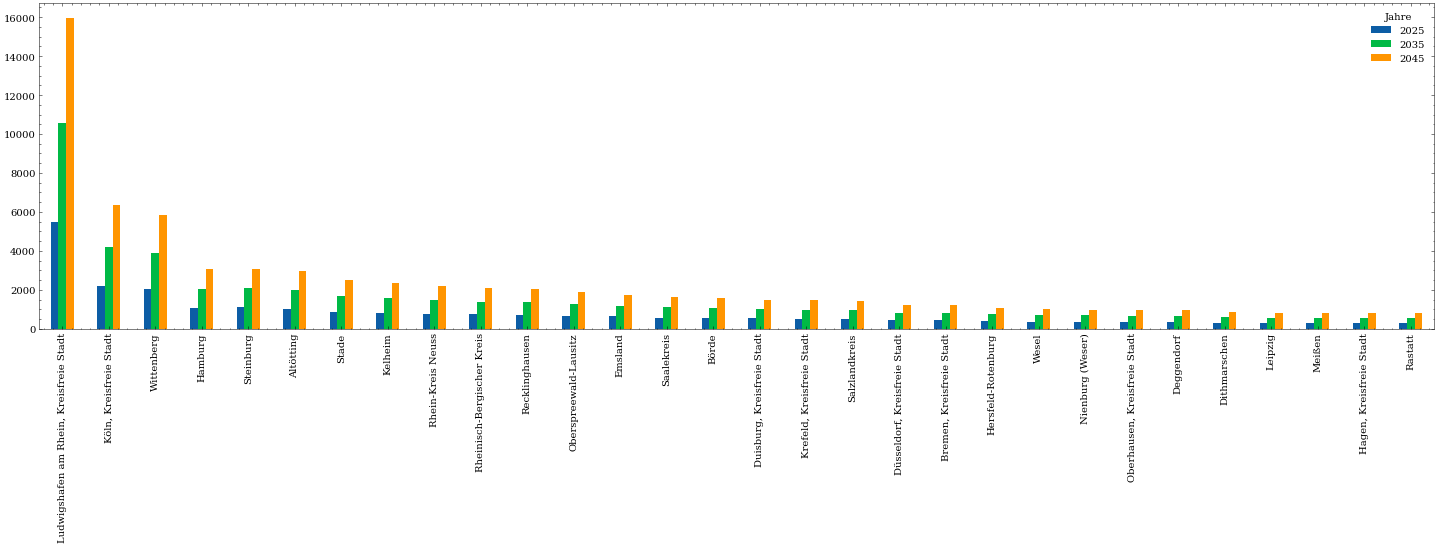

In [73]:
idx = ((df_plot[2045]).nlargest(30)).index
(df_plot.loc[idx]/1000).rename(config.dict_region_code(keys='natcode_nuts3', values='name')).plot(kind='bar', figsize=(25,6))

### 11 after fuel switch temporal results

In [31]:
df_app_gas_pre_switch_curve_2035_cts.sum()/1000000

84.04786544327474

In [6]:
col_slice = pd.IndexSlice

# industry before switch elec
df_app_elc_pre_switch_curve_2025_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_industry_2025_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2035_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_industry_2035_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2045_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_industry_2045_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry before switch gas no KO
df_app_gas_pre_switch_curve_2025_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2025_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2035_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2035_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2045_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2045_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry before switch gas with KO
df_app_gas_pre_switch_curve_2025_ind_KO = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2025_new_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2035_ind_KO = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2035_new_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2045_ind_KO = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2045_new_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# cts before switch elec
df_app_elc_pre_switch_curve_2025_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_cts_2025_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2035_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_cts_2035_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2045_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_cts_2045_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# cts before switch gas
df_app_gas_pre_switch_curve_2025_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_cts_2025_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2035_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_cts_2035_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2045_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_cts_2045_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry power on top
df_app_elc_on_top_curve_2025_ind = pd.read_csv("./data_out/Diss/14_results_elec_from_switch_industry_load_curve_2025_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_elc_on_top_curve_2035_ind = pd.read_csv("./data_out/Diss/14_results_elec_from_switch_industry_load_curve_2035_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_elc_on_top_curve_2045_ind = pd.read_csv("./data_out/Diss/14_results_elec_from_switch_industry_load_curve_2045_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)

# industry gas replaced by electrification no KO
df_app_gas_replaced_curve_2025_ind_no_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2025_no_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_gas_replaced_curve_2035_ind_no_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2035_no_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_gas_replaced_curve_2045_ind_no_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2045_no_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)

# industry gas replaced by electrification with KO
df_app_gas_replaced_curve_2025_ind_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2025_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_gas_replaced_curve_2035_ind_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2035_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_gas_replaced_curve_2045_ind_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2045_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)

# industry gas replaced by hydrogen
df_app_gas_replaced_by_hydro_curve_2025_ind = pd.read_csv("./data_out/Diss/18_results_gas_to_hydro_industry_curve_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_by_hydro_curve_2035_ind = pd.read_csv("./data_out/Diss/18_results_gas_to_hydro_industry_curve_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_by_hydro_curve_2045_ind = pd.read_csv("./data_out/Diss/18_results_gas_to_hydro_industry_curve_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)

# cts power on top
df_app_elc_on_top_curve_2025_cts = (pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SH_bis_BY_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SL_bis_TH_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
df_app_elc_on_top_curve_2035_cts = (pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SH_bis_BY_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SL_bis_TH_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
df_app_elc_on_top_curve_2045_cts = (pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SH_bis_BY_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SL_bis_TH_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
# cts gas replaced
df_app_gas_replaced_curve_2025_cts = (pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SH_bis_BY_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SL_bis_TH_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
df_app_gas_replaced_curve_2035_cts = (pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SH_bis_BY_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SL_bis_TH_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
df_app_gas_replaced_curve_2045_cts = (pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SH_bis_BY_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SL_bis_TH_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
# industry hydrogen on top
df_app_hydro_curve_2025_ind = pd.read_csv("./data_out/Diss/18_results_hydro_industry_curve_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_hydro_curve_2035_ind = pd.read_csv("./data_out/Diss/18_results_hydro_industry_curve_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_hydro_curve_2045_ind = pd.read_csv("./data_out/Diss/18_results_hydro_industry_curve_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)


In [120]:
df_gesamt_no_switch = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])
df_gesamt_no_switch.loc[[2025, 2035, 2045]]/1000000

Sektoren              CTS                industry            
Energieträger       power         gas       power         gas
2025           141.711996  103.430509  212.770025  303.762985
2035           117.507436   84.046493  186.358274  284.537185
2045           109.717729   77.788975  180.275382  280.551725

In [4]:
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/1.52

In [9]:
df_plot = pd.DataFrame()
df_plot[2025] = ( df_app_elc_on_top_curve_2025_ind)
df_plot[2035] = ( df_app_elc_on_top_curve_2035_ind).values.tolist()
df_plot[2045] = ( df_app_elc_on_top_curve_2045_ind).values.tolist()
df_plot.sum()

2025    2.192024e+07
2035    4.027056e+07
2045    5.913960e+07
dtype: float64

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


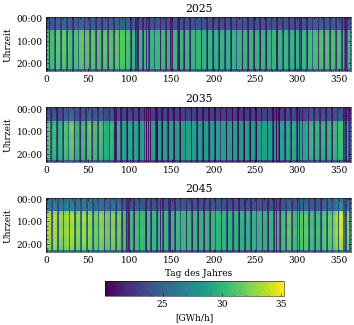

In [68]:
# industrie strom 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_elc_pre_switch_curve_2025_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2025_ind.index)
df_app_elc_pre_switch_curve_2035_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2035_ind.index)
df_app_elc_pre_switch_curve_2045_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_ind.index)

df_app_elc_on_top_curve_2025_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2025_ind.index)
df_app_elc_on_top_curve_2035_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2035_ind.index)
df_app_elc_on_top_curve_2045_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2045_ind.index)

df_plot[2025] = (df_app_elc_pre_switch_curve_2025_ind + df_app_elc_on_top_curve_2025_ind)
df_plot[2035] = (df_app_elc_pre_switch_curve_2035_ind + df_app_elc_on_top_curve_2035_ind).values.tolist()
df_plot[2045] = (df_app_elc_pre_switch_curve_2045_ind + df_app_elc_on_top_curve_2045_ind).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig('./data_out/Plots/17_load_curves_years_industry_elec.svg')

In [16]:
# cts gas 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2025_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2025_cts.index)
df_app_gas_pre_switch_curve_2035_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_cts.index)
df_app_gas_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_cts.index)

df_app_gas_replaced_curve_2025_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2025_cts.index)
df_app_gas_replaced_curve_2035_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2035_cts.index)
df_app_gas_replaced_curve_2045_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2045_cts.index)

df_plot[2025] = (df_app_gas_pre_switch_curve_2025_cts - df_app_gas_replaced_curve_2025_cts.resample('H').sum()).clip(0)
df_plot[2035] = (df_app_gas_pre_switch_curve_2035_cts - df_app_gas_replaced_curve_2035_cts.resample('H').sum()).clip(0).values.tolist()
df_plot[2045] = (df_app_gas_pre_switch_curve_2045_cts - df_app_gas_replaced_curve_2045_cts.resample('H').sum()).clip(0).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig('./data_out/Plots/17_load_curves_years_cts_gas.svg')

In [25]:

df_plot[2045]

2025-01-01 00:00:00     0.000000
2025-01-01 01:00:00     0.000000
2025-01-01 02:00:00     0.000000
2025-01-01 03:00:00     0.000000
2025-01-01 04:00:00     0.000000
                         ...    
2025-12-31 19:00:00     0.000000
2025-12-31 20:00:00     0.000000
2025-12-31 21:00:00     0.000000
2025-12-31 22:00:00    35.036564
2025-12-31 23:00:00     0.000000
Name: 2045, Length: 8760, dtype: float64

In [26]:
df_plot.sum()/1000000

2025    68.955673
2035    28.016870
2045     2.478790
dtype: float64

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


(<Figure size 446.4x293.684 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'2025'}, ylabel='Uhrzeit'>],
        [<AxesSubplot:title={'center':'2035'}, ylabel='Uhrzeit'>],
        [<AxesSubplot:title={'center':'2045'}, xlabel='Tag des Jahres', ylabel='Uhrzeit'>]],
       dtype=object))

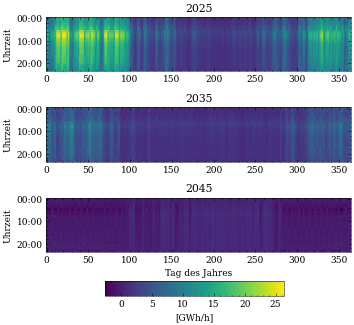

In [72]:
# cts gas 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2025_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2025_cts.index)
df_app_gas_pre_switch_curve_2035_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_cts.index)
df_app_gas_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_cts.index)

df_app_gas_replaced_curve_2025_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2025_cts.index)
df_app_gas_replaced_curve_2035_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2035_cts.index)
df_app_gas_replaced_curve_2045_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2045_cts.index)

df_plot[2025] = (df_app_gas_pre_switch_curve_2025_cts - df_app_gas_replaced_curve_2025_cts.resample('H').sum())
df_plot[2035] = (df_app_gas_pre_switch_curve_2035_cts - df_app_gas_replaced_curve_2035_cts.resample('H').sum()).values.tolist()
df_plot[2045] = (df_app_gas_pre_switch_curve_2045_cts - df_app_gas_replaced_curve_2045_cts.resample('H').sum()).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
#plt.savefig('./data_out/Plots/17_load_curves_years_industry_elec.svg')

In [109]:
df_app_gas_pre_switch_curve_2045_cts.sum()/1000000

133.18492274273567

In [112]:
df_app_gas_replaced_curve_2045_cts.sum()/1000000

77.78897521082256

In [8]:
df_plot = pd.DataFrame()
df_plot[2025] = ( df_app_elc_on_top_curve_2025_cts)
df_plot[2035] = ( df_app_elc_on_top_curve_2035_cts).values.tolist()
df_plot[2045] = ( df_app_elc_on_top_curve_2045_cts).values.tolist()
df_plot.sum()

2025    9.773179e+06
2035    1.573456e+07
2045    2.200105e+07
dtype: float64

In [ ]:
# cts strom 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_elc_pre_switch_curve_2025_cts.index = pd.to_datetime(df_app_elc_pre_switch_curve_2025_cts.index)
df_app_elc_pre_switch_curve_2035_cts.index = pd.to_datetime(df_app_elc_pre_switch_curve_2035_cts.index)
df_app_elc_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_cts.index)

df_app_elc_on_top_curve_2025_cts.index = pd.to_datetime(df_app_elc_on_top_curve_2025_cts.index)
df_app_elc_on_top_curve_2035_cts.index = pd.to_datetime(df_app_elc_on_top_curve_2035_cts.index)
df_app_elc_on_top_curve_2045_cts.index = pd.to_datetime(df_app_elc_on_top_curve_2045_cts.index)

df_plot[2025] = (df_app_elc_pre_switch_curve_2025_cts + df_app_elc_on_top_curve_2025_cts)
df_plot[2035] = (df_app_elc_pre_switch_curve_2035_cts + df_app_elc_on_top_curve_2035_cts).values.tolist()
df_plot[2045] = (df_app_elc_pre_switch_curve_2045_cts + df_app_elc_on_top_curve_2045_cts).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
#plt.savefig(path_plots + '/17_load_curves_years_cts_gas.svg')

### 13 Plots of input data

#### Plot Verbräuche

In [173]:
df_2018 = data.generate_specific_consumption_per_branch(year=2018)
df_gv_sg_2018 =df_2018[5]
df_gv=df_2018[2]
df_gv.loc[33]

df = pd.DataFrame()
df['Restlicher Erdgasverbrauch'] = (df_gv_sg_2018)
df['Erdgas für Stromproduktion'] = (1-df_gv_sg_2018)
df['Erdgasverbrauch 2018'] = df_gv['GV_MWh']/1000000

In [174]:
gas_ind = df.sort_index().iloc[3:32]['Erdgasverbrauch 2018'].sum()

In [175]:
df_plot = df.sort_index().iloc[3:32].nlargest(10, columns='Erdgasverbrauch 2018').rename(index=config.dict_wz())
df_plot['Erdgasverbrauch 2018'].sum()/gas_ind

0.892945598766775

In [170]:
df_plot#.iloc[:,:2]

,Restlicher Erdgasverbrauch,Erdgas für Stromproduktion,Gasverbrauch 2018
Chemieindustrie,0.849631,0.150369,97.673571
Metallerzeugung,0.686154,0.313846,40.068993
Nahrungsindustrie,0.896848,0.103152,33.330034
Papierindustrie,0.751733,0.248267,32.307634
Glas & Keramik,0.989240,0.010760,31.307784
Kokerei & Mineralöl,0.709267,0.290733,22.817163
Metallerzeugnisse,0.950187,0.049813,12.572960
Fahrzeugbau,0.937995,0.062005,10.315541
Pharmazeut. Industrie,0.990649,0.009351,8.479823
Gummi & Kunststoffe,0.915208,0.084792,7.959766


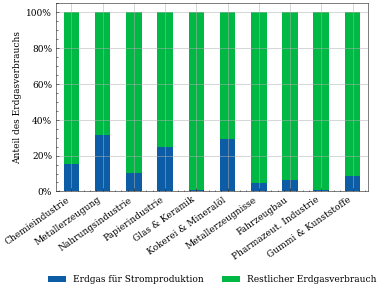

In [97]:
plot_bar(df=df_plot[['Erdgas für Stromproduktion', 'Restlicher Erdgasverbrauch']]*100,
         w_cm=14, ncol=2,loc='upper center', coords=[0.5, -0.4], ylabel='Anteil des Erdgasverbrauchs', rot=35, percentage=True, fig_name=None)
#.plot(kind='bar', stacked=True)


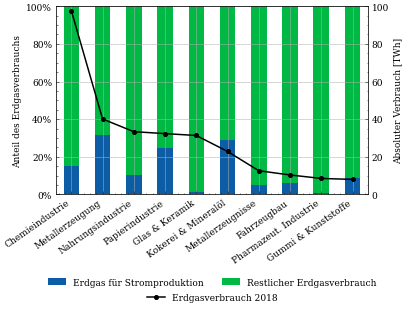

In [176]:
plot_bar_twinx(df1=df_plot[['Erdgas für Stromproduktion', 'Restlicher Erdgasverbrauch']]*100,df2=df_plot[['Erdgasverbrauch 2018']],
               w_cm=14, ncol=2,loc='upper center', coords=[0.5, -0.4], coords2=[0.5, -0.48], ylabel='Anteil des Erdgasverbrauchs', ylabel2='Absoluter Verbrauch [TWh]',ylim=(0,100), ylim2=(0,100),rot=35, percentage=True,
               fig_name='Input_Erdgas_selfgen')
#.plot(kind='bar', stacked=True)


In [165]:
def plot_bar_twinx(df1, df2, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]',ylabel2='Verbrauch [TWh]', xlabel='', stacked=True, ylim=None, ylim2=None, xlim=None,
                   loc=None, ncol=None, coords=None,coords2=None,fs=9, fig_name=None, lw=1, rot=0, percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax1 = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    ax2 = ax1.twinx()

    
    df1.plot(ax=ax1, kind='bar', stacked=stacked)
    df2.plot(ax=ax2, kind='line', marker="o", markersize=4, linewidth=1.5, c='black')
       
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    ax1.grid(True)
    ax1.set_ylim(ylim)
    ax1.set_xlim(xlim)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.tick_params(axis='both', which='both', top=False, right=False)
    ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=rot, ha='right')
    ax1.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax1.set_title(title)
    
    ax2.set_ylim(ylim2)
    ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
    ax2.set_ylabel(ylabel2)
    ax2.legend(loc=loc, bbox_to_anchor=(coords2), ncol=ncol)
    
    if percentage:
        ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

#### plot Beschäftigte

In [201]:
# get number of employees (bze) from database
bze_je_lk_wz = pd.DataFrame(data.employees_per_branch(year=2017))
bze_lk_wz = data.reshape_employees_df(bze_je_lk_wz)
df_plot = bze_lk_wz.sum().to_frame(name='Beschäftigte').drop_duplicates()


In [202]:
new_row=(df_plot.loc['1']+df_plot.loc['2']+df_plot.loc['3'])
new_row.name ='1-3'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['5']+df_plot.loc['6']+df_plot.loc['7-9'])
new_row.name ='5-9'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['17']+df_plot.loc['18'])
new_row.name ='17-18'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['26']+df_plot.loc['27'])
new_row.name ='26-27'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['28']+df_plot.loc['29']+df_plot.loc['30'])
new_row.name ='28-30'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['52']+df_plot.loc['53'])
new_row.name ='52-53'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['45']+df_plot.loc['46']+df_plot.loc['47'])
new_row.name ='45-47'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['50']+df_plot.loc['51'])
new_row.name ='50-51'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['36']+df_plot.loc['37']+df_plot.loc['38-39'])
new_row.name ='36-39'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['41-42']+df_plot.loc['43'])
new_row.name ='41-43'
df_plot=df_plot.append(new_row)

df_plot.drop(index=['1', '2', '3', '5', '6', '7-9', '17', '18', '26', '27', '28', '29', '30', '35', '36', '37', '38-39', '41-42', '43', '45', '46', '47', '50', '51', '52', '53'], inplace=True)
df_plot.sort_index(inplace=True)

In [203]:
values=['Land- u. Forstwirtschaft', 'Nahrungsmittel, u. Tabak', 'Bekleidungsindustrie', 'Holzwaren', 'Papierindustrie u. Druckereien', 'Kokerei- u. Mineralölerzeugnisse',
        'Chemische Industrie', 'Pharmazeutische Industrie', 'Gummi- u. Kunststoffwaren', 'Glasherstellung', 'Metallerzeugung', 'Herst. v. Metallerzeugnissen',
        'Herst. elektr. und opt. Geräte', 'Maschinen u. Fahrzeugbau', 'Hst. v. Möbeln', 'Reparatur Maschinen u. Anl.', 'Wasserwesen u. Abfallentsorgung', 
        'Baugewerbe', 'Handel', 'Landverkehr','Bergbau', 'Schiff- u. Luftfahrt', 'Post u. Lagerei', 'Beherbergung u. Gastronomie',
        'Informations- u. Kommunikations DL', 'Finanz- u. Versicherungsgewerbe', 'Grundstücks- u. Wohnungswesen', 'Wissenschaftliche u. technische DL',
        'Sonst. wirtschaftliche DL', 'Öffentl. Verwaltung', 'Erziehung u. Unterricht', 'Gesundheits- u. Sozialwesen', 'Sonst. DL']
keys=df_plot.sort_index().index
dict_names = dict(zip(keys,values))
df_plot = df_plot.rename(index=dict_names)#.iloc[6:]

In [204]:
# dict_names

In [205]:
# config.dict_wz()

In [206]:
#values=['Landwirtschaft', 'Land-, Forst- u. Fischereiwirtschaft', 'Forstwirtschaft', 'Fischerei', 'Kohle', 'Erdöl und Erdgas', 'Erze, Steine u. Erden',
#        'Nahrungsmittel, u. Tabak', 'Bekleidungsindustrie', 'Holzwaren', 'Papierherstellung', 'Druckereien', 'Kokerei- u. Mineralölerzeugnisse',
#        'Chemische Industrie', 'Pharmazeutische Industrie', 'Gummi- u. Kunststoffwaren', 'Glasherstellung', 'Metallerzeugung', 'Herst. v. Metallerzeugnissen',
#        'Hst. elektronischer u. optischer Erz.', 'Elektrische Ausrüstungen', 'Maschinenbau', 'Fahrzeugbau', 'Sonstiger Fahrzeugbau', 'Hst. v. Möbeln', 
#        'Reparatur Maschinen u. Anl.', 'Energieversorgung', 'Wasserversorgung', 'Abwasserentsorgung', 'Abfallentsorgung', 'Hoch- u. Tiefbau', 'Vorb. Baustellenarbeiten',
#        'Kfz-Handel', 'Großhandel', 'Einzelhandel', 'Landverkehr', 'Schifffahrt', 'Luftfahrt', 'Lagerei', 'Post', 'Beherbergung u. Gastronomie',
#        'Informations- u. Kommunikations DL', 'Finanz- u. Versicherungsgewerbe', 'Grundstücks- u. Wohnungswesen', 'Wissenschaftliche u. technische DL',
#        'Sonst. wirtschaftliche DL', 'Öffentl. Verwaltung', 'Erziehung u. Unterricht', 'Gesundheits- u. Sozialwesen', 'Sonst. DL',  'Bergbau',
#        'Papierindustrie u. Druckereien', 'Herst. elektr. und opt. Geräte', 'Maschinen u. Fahrzeugbau', 'Post u. Lagerei']

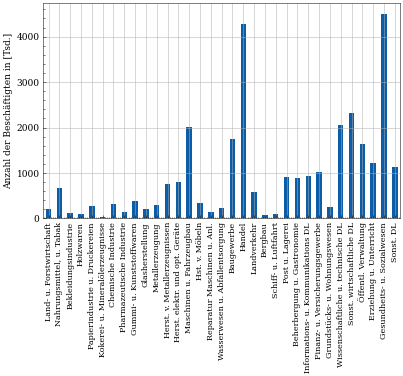

In [207]:
plot_bar(df_plot/1000, w_cm=16, rot=90, ylabel='Anzahl der Beschäftigten in [Tsd.]',fs_xticks=8, fig_name='Beschaftigte_2018', legend=False)

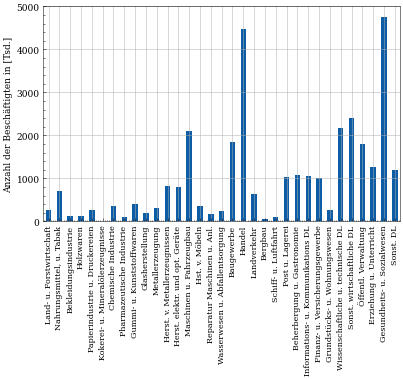

In [200]:
plot_bar(df_plot/1000, w_cm=16, rot=90, ylabel='Anzahl der Beschäftigten in [Tsd.]',fs_xticks=8, fig_name='Beschaftigte_2017', legend=False)

#### Plot BWS

In [139]:
df_BWS = pd.read_excel('./data_in/temporal/Activity_drivers.xlsx', sheet_name=1, header=[0,1], index_col=0)
df_BWS['Durchschnitt'] = df_BWS.mean(axis=1)
df_BWS['Summe'] = df_BWS.sum(axis=1)
col_slice = pd.IndexSlice
df_plot = df_BWS.iloc[:, col_slice[[5,12,15,18, 19,23, 24]]]
df_plot = df_plot.copy().droplevel(1,axis=1)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]
df_plot.head()

,Herstellung von Nahrungs- und Futtermitteln,"Herstellung von Papier, Pappe und Waren daraus",Herstellung von chemischen Erzeugnissen,"Herstellung von Glas und Glaswaren, Keramik, Verarbeitung von Steinen und Erden",Metallerzeugung und -bearbeitung,Maschinenbau,Herstellung von Kraftwagen und Kraftwagenteilen
2015,29795836.0,10249216.0,39820214.0,13572929.0,18858851.0,82271875.0,96380552.0
2016,32644166.0,10492563.0,42259022.0,14681030.0,19176665.0,85353839.0,107044021.0
2017,32978938.0,10708109.0,45445108.0,15124370.0,20736379.0,91600696.0,105985303.0
2018,33548422.0,11456037.0,42246597.0,15924338.0,22209720.0,95404750.0,105260940.0
2019,34447429.0,11257919.0,40633463.0,16110285.0,19202209.0,92970351.0,102048712.0


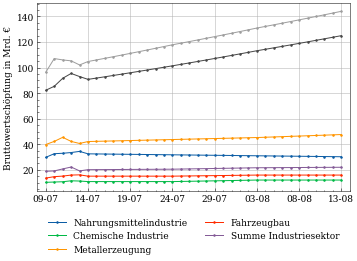

In [140]:

#plot_line(df_plot/1000000, ylim=(0,350), xlim=(2000, 2020), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'], fs=9, loc=9, coords=(0.5, -0.1), ncol=2)

plot_line(df_plot/1000000, w_cm=14, f=1, labels=['Nahrungsmittelindustrie', 'Chemische Industrie', 'Metallerzeugung', 'Fahrzeugbau', 'Summe Industriesektor'],
         fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='Bruttowertschöpfung in Mrd. €', xlim=(2014, 2051))

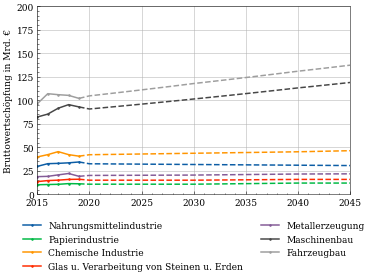

In [142]:
plot_multi_line([df_plot1/1000000, df_plot2/1000000], w_cm=14, ylim=(0,200), xlim=(2015, 2045),
                labels=['Nahrungsmittelindustrie', 'Papierindustrie','Chemische Industrie',  
                        'Glas u. Verarbeitung von Steinen u. Erden','Metallerzeugung', 'Maschinenbau','Fahrzeugbau'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='Bruttowertschöpfung in Mrd. €', fig_name='BWS_Prognose')

#### plot Beschäftigte prognose

In [183]:
df_emp = pd.read_excel('./data_in/temporal/Activity_drivers.xlsx', sheet_name=2, header=[0,1], index_col=0)
df_emp['Summe'] = df_emp.sum(axis=1)
col_slice = pd.IndexSlice
df_plot = df_emp.iloc[:, col_slice[[12,26, 31, 43,44,45]]]
df_plot = df_plot.copy().droplevel(1,axis=1)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]
df_plot_emp =df_plot.copy()
df_plot.head()

,Einzelhandel (ohne Handel mit Kraftfahrzeugen),Erbringung von Finanzdienstleistungen,Verwaltung und Führung von Unternehmen und Betrieben; Unternehmensberatung,"Öffentliche Verwaltung, Verteidigung; Sozialversicherung",Erziehung und Unterricht,Gesundheitswesen
2015,2341363.0,661596.0,621583.0,1721059.0,1184260.0,2338429.0
2016,2384846.0,648699.0,641041.0,1762296.0,1226198.0,2386229.0
2017,2420456.0,634664.0,678721.0,1789273.0,1266851.0,2437185.0
2018,2448806.0,624480.0,712344.0,1823784.0,1297011.0,2487503.0
2019,2462599.0,619977.0,743250.0,1866922.0,1329298.0,2554965.0


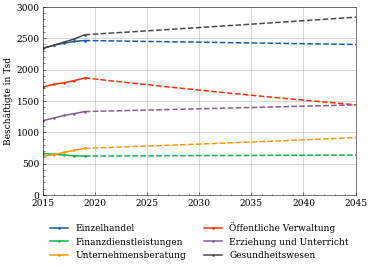

In [184]:
plot_multi_line([df_plot1/1000, df_plot2/1000], w_cm=14, ylim=(0,3000), xlim=(2015, 2045),
                labels=[ 'Einzelhandel','Finanzdienstleistungen',  
                        'Unternehmensberatung','Öffentliche Verwaltung', 'Erziehung und Unterricht','Gesundheitswesen'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='Beschäftigte in Tsd', fig_name='BEsch_Prognose')

#### plot EBF

In [162]:
df_ebf = pd.read_excel('./data_in/temporal/Activity_drivers.xlsx', sheet_name=3, header=[0,1], index_col=0)
df_ebf['Summe'] = df_ebf.sum(axis=1)
col_slice = pd.IndexSlice
df_plot = df_ebf.iloc[:, col_slice[[12,26, 31, 43,44,45]]]
df_plot = df_plot.copy().droplevel(1,axis=1)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]
df_plot_ebf =df_plot.copy()

df_plot.head()

,Einzelhandel (ohne Handel mit Kraftfahrzeugen),Erbringung von Finanzdienstleistungen,Verwaltung und Führung von Unternehmen und Betrieben; Unternehmensberatung,"Öffentliche Verwaltung, Verteidigung; Sozialversicherung",Erziehung und Unterricht,Gesundheitswesen
2015,1.749533e+08,1.970714e+07,3.590219e+07,9.793055e+07,7.636784e+07,6.316872e+07
2016,1.788827e+08,1.941460e+07,3.710233e+07,1.003599e+08,7.932165e+07,6.476217e+07
2017,1.822466e+08,1.908463e+07,3.936409e+07,1.019805e+08,8.220995e+07,6.645522e+07
2018,1.850850e+08,1.886745e+07,4.139923e+07,1.040334e+08,8.443260e+07,6.814525e+07
2019,1.868379e+08,1.882023e+07,4.328436e+07,1.065821e+08,8.680736e+07,7.032152e+07


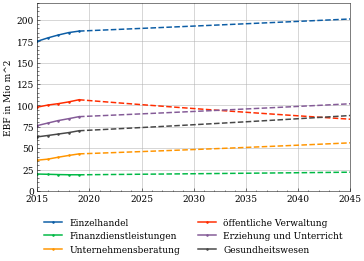

In [160]:
plot_multi_line([df_plot1/1000000, df_plot2/1000000], w_cm=14, xlim=(2015, 2045),ylim=(0,220),
                labels=[ 'Einzelhandel','Finanzdienstleistungen',  
                        'Unternehmensberatung','öffentliche Verwaltung', 'Erziehung und Unterricht','Gesundheitswesen'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='EBF in Mio m^2', fig_name='EBF_Prognose')

In [164]:
df_plot = df_plot_ebf.div(df_plot_emp)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]

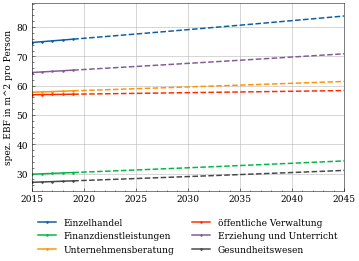

In [169]:
plot_multi_line([df_plot1, df_plot2], w_cm=14, xlim=(2015, 2045)
                labels=[ 'Einzelhandel','Finanzdienstleistungen',  
                        'Unternehmensberatung','öffentliche Verwaltung', 'Erziehung und Unterricht','Gesundheitswesen'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='spez. EBF in m^2 pro Person')

#### Plots of BSP

In [63]:
# mit low = 0.3
df_bsp = (pd.read_excel("./data_in/temporal/Schichtprofile_timestamp_BE_2015.xlsx", header=[0], usecols=[0,1,2,3,4,5,6,7,8,9], 
                        index_col=[0], sheet_name="Schichtprofile_timestamp_BE_201"))
df_bsp.tail()

,S1_WT,S1_WT_SA,S1_WT_SA_SO,S2_WT,S2_WT_SA,S2_WT_SA_SO,S3_WT,S3_WT_SA,S3_WT_SA_SO
Date,,,,,,,,,
2015-12-31 22:45:00+01:00,0.000018,0.000017,0.000016,0.000013,0.000040,0.000036,0.000011,0.000032,0.000029
2015-12-31 23:00:00+01:00,0.000018,0.000017,0.000016,0.000013,0.000012,0.000011,0.000011,0.000032,0.000029
2015-12-31 23:15:00+01:00,0.000018,0.000017,0.000016,0.000013,0.000012,0.000011,0.000011,0.000032,0.000029
2015-12-31 23:30:00+01:00,0.000018,0.000017,0.000016,0.000013,0.000012,0.000011,0.000011,0.000032,0.000029
2015-12-31 23:45:00+01:00,0.000018,0.000017,0.000016,0.000013,0.000012,0.000011,0.000011,0.000032,0.000029


In [ ]:
df_bsp_in_W=(df_bsp*4000000)
df_bsp_in_W.set_index(pd.to_datetime(df_bsp_in_W.index, utc=True), inplace=True)

In [71]:
state = 'BE'
year = 2015
low = 0.50
df_bsp = temporal.shift_load_profile_generator(state, low, year=year)
df_bsp.head()

,S1_WT,S1_WT_SA,S1_WT_SA_SO,S2_WT,S2_WT_SA,S2_WT_SA_SO,S3_WT,S3_WT_SA,S3_WT_SA_SO
Date,,,,,,,,,
2015-01-01 00:00:00,0.000023,0.000022,0.000021,0.000019,0.000018,0.000017,0.000017,0.000016,0.000029
2015-01-01 00:15:00,0.000023,0.000022,0.000021,0.000019,0.000018,0.000017,0.000017,0.000016,0.000029
2015-01-01 00:30:00,0.000023,0.000022,0.000021,0.000019,0.000018,0.000017,0.000017,0.000016,0.000029
2015-01-01 00:45:00,0.000023,0.000022,0.000021,0.000019,0.000018,0.000017,0.000017,0.000016,0.000029
2015-01-01 01:00:00,0.000023,0.000022,0.000021,0.000019,0.000018,0.000017,0.000017,0.000016,0.000029


In [72]:
df_bsp_in_W=(df_bsp*4000000)
df_plot = df_bsp_in_W.loc[df_bsp_in_W.index.isocalendar().week == 21][['S1_WT', 'S2_WT', 'S3_WT']]


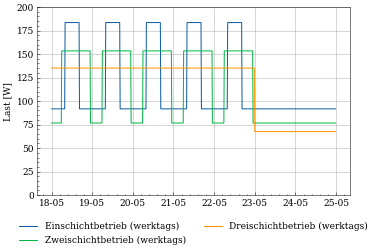

In [73]:
plot_line(df_plot, ylim=(0,200),
          labels=['Einschichtbetrieb (werktags)', 'Zweischichtbetrieb (werktags)', 'Dreischichtbetrieb (werktags)'],
          fs=9, loc=9, coords=(0.5, -0.1), ncol=2, f=1, w_cm=14, ylabel='Last [W]', fig_name='BSP_Visualisierung', marker=False)

#### Plot Strom SLP

In [55]:
df_slp = pd.read_excel("./data_in/temporal/Power Load Profiles/39_VDEW_Strom_Repräsentative Profile_G0.xlsx", header=[2], usecols=[0,1,2,3], index_col=[0],nrows=96)
df_plot = df_slp.copy()
df_slp.head()

,Samstag,Sonntag,Werktag
[W],,,
00:15:00,70.0,63.2,65.5
00:30:00,73.0,61.0,62.6
00:45:00,75.9,58.9,59.6
01:00:00,77.6,57.0,57.0
01:15:00,77.1,55.3,54.8


In [56]:
df_plot['neu']=pd.date_range("2018-01-01 00:15:00", periods=96, freq="15T")#.time
df_plot.set_index('neu', inplace=True)
df_plot.head()

,Samstag,Sonntag,Werktag
neu,,,
2018-01-01 00:15:00,70.0,63.2,65.5
2018-01-01 00:30:00,73.0,61.0,62.6
2018-01-01 00:45:00,75.9,58.9,59.6
2018-01-01 01:00:00,77.6,57.0,57.0
2018-01-01 01:15:00,77.1,55.3,54.8


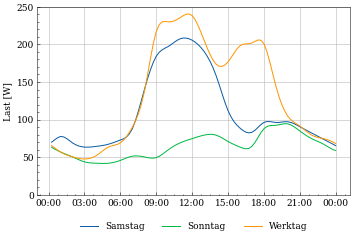

In [59]:
plot_line(df_plot, ylim=(0,250),
          labels=['Samstag', 'Sonntag', 'Werktag'],
          fs=9, loc=9, coords=(0.5, -0.1), ncol=3, f=1, w_cm=14, ylabel='Last [W]', fig_name='SLP_Visualisierung_time', marker=False,
         fmt='%H:%M')

#### Plot Gas SLP

In [79]:
from disaggregator.heat import *
state='BE'
df = create_heat_norm_industry(state=state, slp='KO', df_gv_lk=None, _df=None, year=2015)
df_gas = df[1]

2022-07-11 14:26:09 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


In [93]:
df_plot = (df_gas/df_gas.sum())*1000000
df_plot.head()

,11000
2015-01-01 00:00:00,180.267408
2015-01-01 01:00:00,182.757289
2015-01-01 02:00:00,176.283598
2015-01-01 03:00:00,194.210743
2015-01-01 04:00:00,268.907183


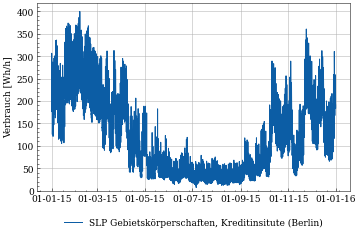

In [94]:
plot_line(df_plot, 
          labels=['SLP Gebietskörperschaften, Kreditinsitute (Berlin)'], ylim=(0),
          fs=9, loc=9, coords=(0.5, -0.1), ncol=3, f=1, w_cm=14, ylabel='Verbrauch [Wh/h]', fig_name='SLP_Gas_Visualisierung', marker=False,
          fmt='%d-%m-%y')

#### Plot BLP

In [69]:
df_industry_blp_wz17 = (pd.read_csv("C:/Users/Paul Verwiebe/tubCloud2/Dissertation/Diss_gesamt/Python/Backup/disaggregator-master/data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ17_Papierherstellung_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                        .rename(columns={"Mean_Value_01001":"Papierherstellung"}))
df_industry_blp_wz21 = (pd.read_csv("C:/Users/Paul Verwiebe/tubCloud2/Dissertation/Diss_gesamt/Python/Backup/disaggregator-master/data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ21_Pharmazeutische Erzeugnisse_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                        .rename(columns={"Mean_Value_01001":"Pharmazeutische Erzeugnisse"}))
df_industry_blp_wz87 = (pd.read_csv("C:/Users/Paul Verwiebe/tubCloud2/Dissertation/Diss_gesamt/Python/Backup/disaggregator-master/data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ87_Heime_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                        .rename(columns={"Mean_Value_01001":"Heime"}))

In [7]:
df_industry_blp_wz17 = (pd.read_csv("./data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ17_Papierherstellung_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                        .rename(columns={"Mean_Value_01001":"Papierherstellung"}))
df_industry_blp_wz21 = (pd.read_csv("./data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ21_Pharmazeutische Erzeugnisse_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                       .rename(columns={"Mean_Value_01001":"Pharmazeutische Erzeugnisse"}))
df_industry_blp_wz87 = (pd.read_csv("./data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ87_Heime_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                       .rename(columns={"Mean_Value_01001":"Heime"}))

FileNotFoundError: [Errno 2] No such file or directory: './data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ17_Papierherstellung_401LK_2019.csv'

In [90]:
new_df= pd.concat([df_industry_blp_wz17, df_industry_blp_wz21, df_industry_blp_wz87], axis=1).set_index(pd.to_datetime(df_industry_blp_wz17.index))
new_df.sum()

Papierherstellung              3999.995159
Pharmazeutische Erzeugnisse    4000.065601
Heime                          4000.014795
dtype: float64

In [91]:
df_plot = new_df.loc[new_df.index.isocalendar().week == 20]#.plot()#.resample('H').mean()

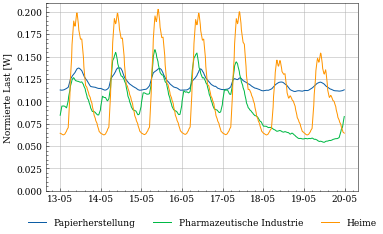

In [92]:
plot_line(df_plot, 
          labels=['Papierherstellung', 'Pharmazeutische Industrie', 'Heime'], ylim=(0),
          fs=9, loc=9, coords=(0.5, -0.1), ncol=3, f=1, w_cm=14, ylabel='Normierte Last [W]', fig_name='BLP_Visualisierung', marker=False)

In [27]:
df_industry_blp_wz10 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ10_Nahrungs- und Futtermittelherstellung_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"Nahrungsmittel"}))
df_industry_blp_wz11 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ11_Getränkeherstellung_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"Getränkeherstellung"}))
df_industry_blp_wz12 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ12_Tabakverarbeitung_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"Tabak"}))

In [40]:
df_industry_blp_wz10 = df_industry_blp_wz10.iloc[1:]
df_industry_blp_wz11 = df_industry_blp_wz11.iloc[1:]
df_industry_blp_wz12 = df_industry_blp_wz12.iloc[1:]

In [41]:
new_df= pd.concat([df_industry_blp_wz10, df_industry_blp_wz11, df_industry_blp_wz12], axis=1).set_index(pd.to_datetime(df_industry_blp_wz10.index))
new_df.sum()

Nahrungsmittel         3999.961286
Getränkeherstellung    3999.946933
Tabak                  3999.932149
dtype: float64

In [42]:
df_plot = new_df.loc[new_df.index.isocalendar().week == 20]#.plot()#.resample('H').mean()

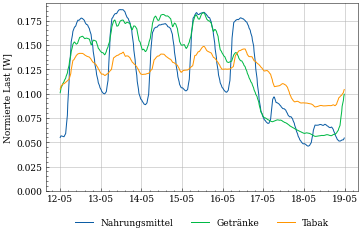

In [43]:
plot_line(df_plot, 
          labels=['Nahrungsmittel', 'Getränke', 'Tabak'], ylim=(0),
          fs=9, loc=9, coords=(0.5, -0.1), ncol=3, f=1, w_cm=14, ylabel='Normierte Last [W]', fig_name=None, marker=False)

In [37]:
df_industry_blp_1 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ20_Chemische Erzeugnisse_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"chem. Industrie"}))
df_industry_blp_2 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ22_Gummi- und Kunststoffwaren_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"Gummi"}))
df_industry_blp_3 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ23_Steine- und Erdenverarbeitung, Glaswaren_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"Tabak"}))


df_industry_blp_1 = df_industry_blp_1.iloc[1:]
df_industry_blp_2 = df_industry_blp_2.iloc[1:]
df_industry_blp_3 = df_industry_blp_3.iloc[1:]

In [44]:
new_df= pd.concat([df_industry_blp_1, df_industry_blp_2, df_industry_blp_3], axis=1).set_index(pd.to_datetime(df_industry_blp_1.index))
new_df.sum()

chem. Industrie    3999.999973
Gummi              4000.000037
Tabak              3999.999966
dtype: float64

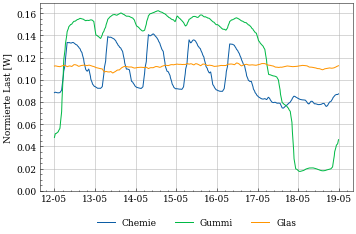

In [45]:
df_plot = new_df.loc[new_df.index.isocalendar().week == 20]#.plot()#.resample('H').mean()
plot_line(df_plot, 
          labels=['Chemie', 'Gummi', 'Glas'], ylim=(0),
          fs=9, loc=9, coords=(0.5, -0.1), ncol=3, f=1, w_cm=14, ylabel='Normierte Last [W]', fig_name=None, marker=False)

In [46]:
df_industry_blp_1 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ24_Metallerzeugung und -bearbeitung_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"chem. Industrie"}))
df_industry_blp_2 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ25_Metallerzeugnisse_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"Gummi"}))
df_industry_blp_3 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ26_Datenverarbeitungsgeräte, elektronische u. optische Erzeugnisse_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"Tabak"}))


df_industry_blp_1 = df_industry_blp_1.iloc[1:]
df_industry_blp_2 = df_industry_blp_2.iloc[1:]
df_industry_blp_3 = df_industry_blp_3.iloc[1:]

In [47]:
new_df= pd.concat([df_industry_blp_1, df_industry_blp_2, df_industry_blp_3], axis=1).set_index(pd.to_datetime(df_industry_blp_1.index))
new_df.sum()

chem. Industrie    3999.999961
Gummi              3999.999939
Tabak              3999.999998
dtype: float64

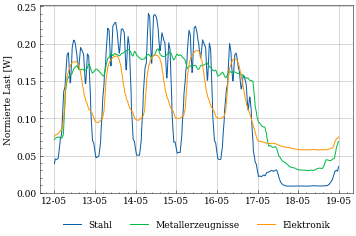

In [49]:
df_plot = new_df.loc[new_df.index.isocalendar().week == 20]#.plot()#.resample('H').mean()
plot_line(df_plot, 
          labels=['Stahl', 'Metallerzeugnisse', 'Elektronik'], ylim=(0),
          fs=9, loc=9, coords=(0.5, -0.1), ncol=3, f=1, w_cm=14, ylabel='Normierte Last [W]', fig_name=None, marker=False)

In [50]:
df_industry_blp_1 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ28_Maschinenbau_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"chem. Industrie"}))
df_industry_blp_2 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ29_Kraftwagen und Kraftwagenteile_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"Gummi"}))
df_industry_blp_3 = (pd.read_csv("./data_in/temporal/BLP/Branch_Prediction_WZ31_Möbelherstellung_401LK_2025.csv",
                                    sep=';', decimal=',',usecols=[0,1],index_col=[0], skiprows=[1])
                        .rename(columns={"Mean_Value_01001":"Tabak"}))


df_industry_blp_1 = df_industry_blp_1.iloc[1:]
df_industry_blp_2 = df_industry_blp_2.iloc[1:]
df_industry_blp_3 = df_industry_blp_3.iloc[1:]

In [51]:
new_df= pd.concat([df_industry_blp_1, df_industry_blp_2, df_industry_blp_3], axis=1).set_index(pd.to_datetime(df_industry_blp_1.index))
new_df.sum()

chem. Industrie    3999.999986
Gummi              3999.999978
Tabak              3999.999958
dtype: float64

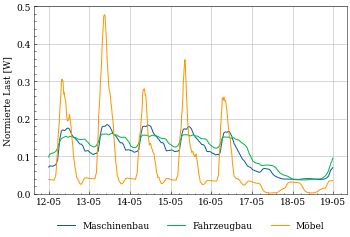

In [53]:
df_plot = new_df.loc[new_df.index.isocalendar().week == 20]#.plot()#.resample('H').mean()
plot_line(df_plot, 
          labels=['Maschinenbau', 'Fahrzeugbau', 'Möbel'], ylim=(0),
          fs=9, loc=9, coords=(0.5, -0.1), ncol=3, f=1, w_cm=14, ylabel='Normierte Last [W]', fig_name=None, marker=False)

#### Plot COP

In [30]:
def plot_COP():	
    """
    Plots the COP depending on the temperature difference
    """
    w_cm=10
    w_in=w_cm/2.5
    fs=9
    cf=0.85
    
    plt.rcParams.update({'font.size':fs})
    diff1 = pd.Series(data=range(0,70))
    diff2 = pd.Series(data=range(0,70))

    water_cop = heat.cop_curve(diff1,'water')*cf
    air_cop = heat.cop_curve(diff1,'air')*cf
    ground_cop = heat.cop_curve(diff1,'ground')*cf
    waste_heat_cop = 68.455*(diff1.pow(-0.76))*cf


    fig, ax = plt.subplots(figsize=(w_in,(w_in/1.618)))
    lw=0.75
    water_cop.plot(ax=ax, linewidth=lw)
    air_cop.plot(ax=ax, linewidth=lw)
    ground_cop.plot(ax=ax, linewidth=lw)
    waste_heat_cop.plot(ax=ax, linewidth=lw)

    fig.legend(['Grundwasser','Luft','Boden', 'Abwärme'],
               loc = 'upper center',fontsize=fs, ncol=2, bbox_to_anchor=(0.5,-0.01))
    ax.set_ylabel('COP', fontsize=fs)
    ax.set_xlabel('Temperaturdifferenz in °C', fontsize=fs)
    ax.set_ylim(0,8.5)

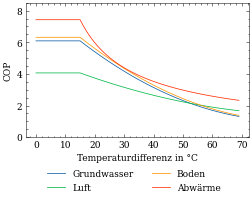

In [31]:
plot_COP()
plt.savefig('./data_out/Plots/COP.svg',bbox_inches='tight')

#### Plot Temp

In [32]:
    year=2018
        # change index to datetime
    if ((year % 4 == 0)
            & (year % 100 != 0)
            | (year % 4 == 0)
            & (year % 100 == 0)
            & (year % 400 == 0)):
        periods = 35136
    else:
        periods = 35040
    date = pd.date_range((str(year) + '-01-01'), periods= periods/4, freq='H')

    # get source temperatures
    soil_t = heat.soil_temp(year)
    soil_t.index = date

    air_t = data.ambient_T(year=year)
    air_t = heat.change_nuts3_to_ags(air_t)
    air_t.index = date

    water_t = pd.DataFrame(index=soil_t.index, columns=soil_t.columns, data=5)

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\heat.py:1756: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  soil_t[ags_lk] = df.loc[:, lat].loc[:, lon]


2022-07-15 19:25:21 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


In [50]:
def plot_source_temps(water_t, air_t, soil_t, lk=11000, **kwargs):
    """
    Plots the heat source temperatures of water, air and ground
    Parameters
    ----------
    lk : int, default 11000 (Berlin)

    """

    # get base year
    year = 2018
    w_cm=14
    w_in=w_cm/2.5
    fs=9
    f=0.6
    plt.rcParams.update({'font.size':fs})
        

    lw=0.6
    # plot
    fig, ax = plt.subplots(figsize=(w_in,(w_in/1.618)*f))
    water_t.loc[:,lk].plot(ax=ax, linewidth=lw)
    air_t.loc[:,lk].plot(ax=ax, zorder=1, linewidth=lw)
    soil_t.loc[:,lk].plot(ax=ax, linewidth=lw)
    fig.legend(['Grundwasser','Luft','Boden'],
              loc = 'upper center',fontsize=fs, ncol=3, bbox_to_anchor=(0.5, -0.01))
    ax.set_ylabel('Temperatur [°C]')

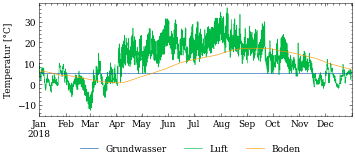

In [51]:
plot_source_temps(soil_t=soil_t, water_t=water_t, air_t=air_t,year=2018)
plt.savefig('./data_out/Plots/temp_2018.svg',bbox_inches='tight')
